# Program and result display for Dos_Slowhttptest attack

In [1]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import pandas as pd
from Attack_RF import attack_RF
from config_fileRF import config
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt  
import numpy as np
from Data_preprocessing import procedata
import warnings

importing Jupyter notebook from Attack_RF.ipynb
importing Jupyter notebook from config_fileRF.ipynb
importing Jupyter notebook from Data_preprocessing.ipynb
importing Jupyter notebook from Smoteclass.ipynb


In [2]:
n_splits_k =  config["RF"]["n_splits_k"]

In [3]:
n_splits_k

10

In [4]:
def run_main():
    # Ignore warning messages. The warning message is mainly warning the labels 
    # contained in the training set. When testing the data, some labels did not appear.
   # warnings.filterwarnings("ignore")
    precision_of_8 = []
    recall_of_8 = []
    f1_of_8 = []
    accuracy_mean = []
    for k in range(100):
        print("The sampling rate of the Dos_Slowhttptest attack is：",k+1)
        procedata()   
        # The data currently used is entirely the attack data in the original dataset, 
        # not the output data of the CNN
        datasets = pd.read_csv("data/attack_RF.csv") 
        features = datasets.iloc[:,:-1]
        labels =  datasets.iloc[:,-1]
          
        # random_state is a fixed value for easy parameter adjustment
        skf = StratifiedKFold(n_splits=n_splits_k,random_state = 2)
        # The accracy_of_classes list holds the accuracy of each compromise
        accracy_of_classes = []
        # The precision_of_classes list holds the precision of each class in each compromise test set
        precision_of_classes = []
        # The recall_of_classes list holds the recall value of each class in each compromise test set
        recall_of_classes = []
        # The f1_of_classes list holds the f1 value of each class in each compromise test set
        f1_of_classes = []
        # flag is used to mark whether to output the training set and test set size，
        # flag = 0 means no output, flag = 1 means output
        flag = 0 
        print("n_splits_k value is:",n_splits_k)
       
        for train_index, test_index in skf.split(features,labels):  
            # The following is the training and test set segmentation process
            features_train = features.iloc[train_index]
            features_test =  features.iloc[test_index]
            labels_train = labels.iloc[train_index]
            labels_test =  labels.iloc[test_index]
            features_train = features_train.values
            labels_train = labels_train.values
            features_test = features_test.values
            labels_test = labels_test.values
            labels_train = labels_train.reshape(len(labels_train))
            labels_test = labels_test.reshape(len(labels_test))
            if flag==0:
                print("Number of examples in the train set:",labels_train.shape)
                print("Number of examples in the test set:",labels_test.shape)
                flag = 1
            # attack_RF returns the accuracy of each test set and the precision, recall, and f1 values of each class 
            accuracy,precision,recall,f1 = attack_RF(features_train,labels_train,features_test,labels_test)
#             precision_of_13.append(precision[12])
#             recall_of_13.append(recall[12])
#             f1_of_13.append(f1[12])
#             print(precision)
#             print("recall_of_13 is:",recall_of_13)
            precision_of_classes.append(precision)
            recall_of_classes.append(recall)
            f1_of_classes.append(f1)
            accracy_of_classes.append(accuracy)
        
        # Find the average of all the precisions in all prediction sets in each compromise
        precision_mean=np.mean(precision_of_classes,axis=0)
        # Find the average of all the recall value in all prediction sets in each compromise
        recall_mean = np.mean( recall_of_classes,axis=0)
        # Find the average of all the f1 value in all prediction sets in each compromise
        f1_mean = np.mean(f1_of_classes,axis=0)
        acc_avg = np.mean(accracy_of_classes)
        accuracy_mean.append(acc_avg)
        print("accuracy_mean value is :",acc_avg)
        precision_of_8.append(precision_mean[7])
        recall_of_8.append(recall_mean[7])
        f1_of_8.append(f1_mean[7])
        print("precision_mean[7],recall_mean[7],f1_mean[7]",precision_mean[7],recall_mean[7],f1_mean[7])
        print(precision_of_8,recall_of_8,f1_of_8)
        # Visualize the precision average, recall average, and f1 average of all classes in each compromise.
        plt.figure()
        x = range(1,len(precision)+1)
        y1 = precision_mean
        y2 = recall_mean
        y3 = f1_mean
        pre = plt.plot(x,y1,label = "precision")
        rec = plt.plot(x,y2,label = "recall")
        f1_ = plt.plot(x,y3,label = "f1") 
        plt.xlabel('labels of attack')
        plt.legend(['precision','recall','f1'])
        plt.show()
        
        plt.figure()
        x = range(1,len(precision_of_8)+1)
        y1 = precision_of_8
        y2 = recall_of_8
        y3 = f1_of_8
        pre = plt.plot(x,y1,label = "precision_of_8")
        rec = plt.plot(x,y2,label = "recall_of_8")
        f1_ = plt.plot(x,y3,label = "f1_of_8") 
        plt.xlabel('sampling_rate')
        plt.legend(['precision_of_8','recall_of_8','f1_of_8'])
        plt.show()
        
        
        plt.figure()
        x = range(1,len(accuracy_mean)+1)
        y1 = accuracy_mean
        acc_mean = plt.plot(x,y1,label = "accuracy_mean")   
        plt.xlabel('sampling_rate')
        plt.ylabel('accuracy mean')
        plt.show()
        
        
        
        
    # As the number of cross-validation folds increases, accuracy is worth changing    
#     plt.figure()
#     plt.plot(n_splits_k,accuracy_split)
#     plt.ylabel('accuracy_split')
#     plt.xlabel('n_splits_k')
#     plt.show()

The sampling rate of the Dos_Slowhttptest attack is： 1
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (677523,)
Number of examples in the test set: (75289,)
accuracy_mean value is : 0.9952978338318861
precision_mean[7],recall_mean[7],f1_mean[7] 0.986130407968081 0.9944535528166101 0.9900727595764849
[0.986130407968081] [0.9944535528166101] [0.9900727595764849]


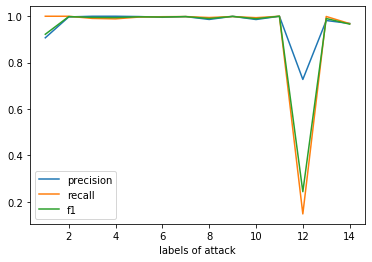

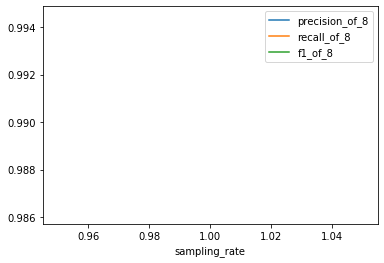

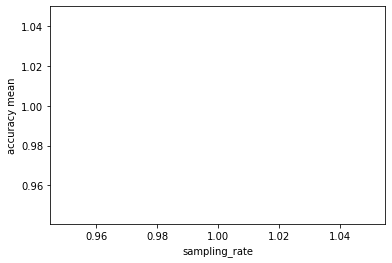

The sampling rate of the Dos_Slowhttptest attack is： 2
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (682472,)
Number of examples in the test set: (75839,)
accuracy_mean value is : 0.9951736818025456
precision_mean[7],recall_mean[7],f1_mean[7] 0.988060799900245 0.9949080250656964 0.9913287974758314
[0.986130407968081, 0.988060799900245] [0.9944535528166101, 0.9949080250656964] [0.9900727595764849, 0.9913287974758314]


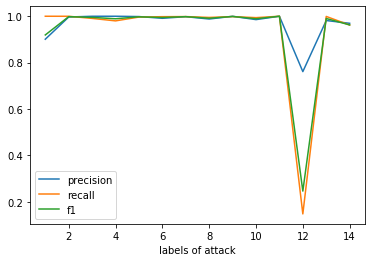

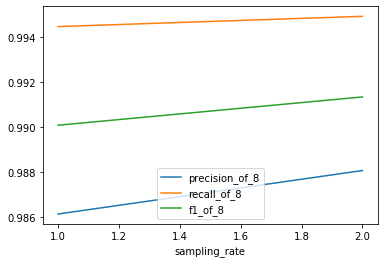

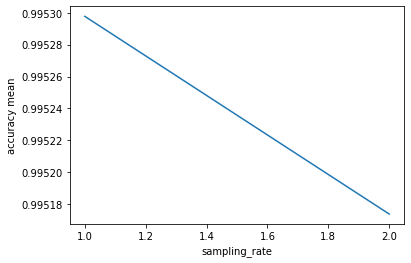

The sampling rate of the Dos_Slowhttptest attack is： 3
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (687421,)
Number of examples in the test set: (76389,)
accuracy_mean value is : 0.9951115453439845
precision_mean[7],recall_mean[7],f1_mean[7] 0.9911140079043218 0.995362747529869 0.9931567882204234
[0.986130407968081, 0.988060799900245, 0.9911140079043218] [0.9944535528166101, 0.9949080250656964, 0.995362747529869] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234]


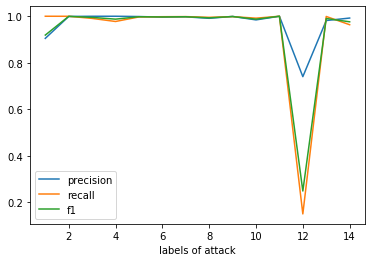

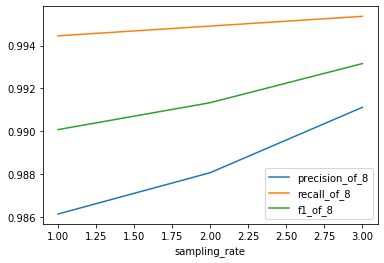

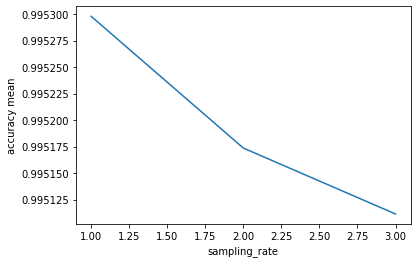

The sampling rate of the Dos_Slowhttptest attack is： 4
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (692370,)
Number of examples in the test set: (76939,)
accuracy_mean value is : 0.9952478856077089
precision_mean[7],recall_mean[7],f1_mean[7] 0.9930957509085163 0.9954173616852409 0.9942117126868176
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176]


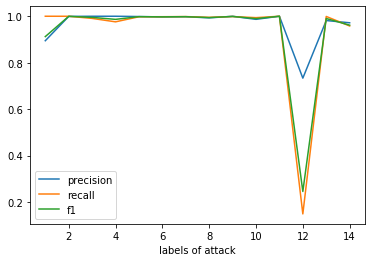

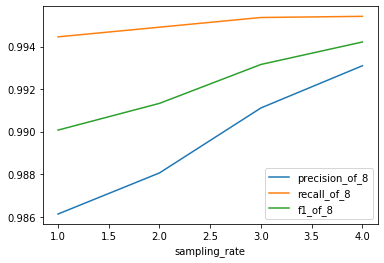

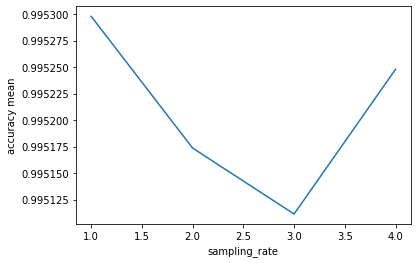

The sampling rate of the Dos_Slowhttptest attack is： 5
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (697319,)
Number of examples in the test set: (77489,)
accuracy_mean value is : 0.9952570916059615
precision_mean[7],recall_mean[7],f1_mean[7] 0.9925771219825489 0.9957870612766035 0.9941478876562156
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156]


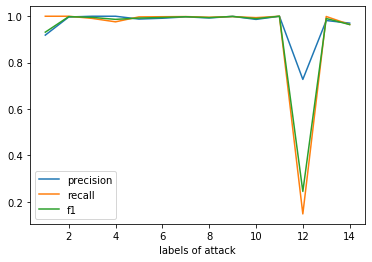

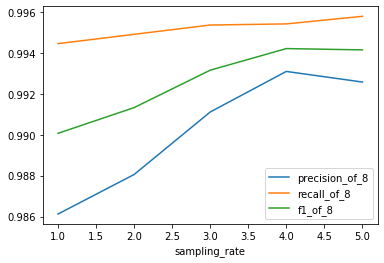

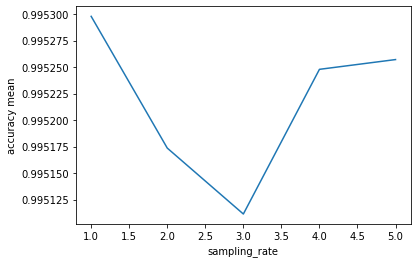

The sampling rate of the Dos_Slowhttptest attack is： 6
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (702268,)
Number of examples in the test set: (78039,)
accuracy_mean value is : 0.9953033378674249
precision_mean[7],recall_mean[7],f1_mean[7] 0.9947229533484145 0.9959213018729777 0.9952980271532679
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679]


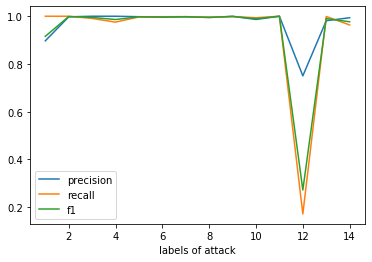

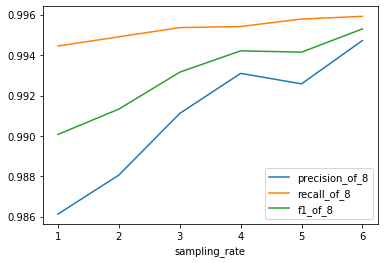

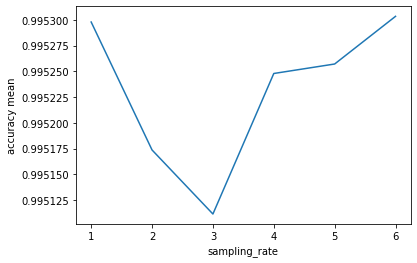

The sampling rate of the Dos_Slowhttptest attack is： 7
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (707217,)
Number of examples in the test set: (78589,)
accuracy_mean value is : 0.9952471217413941
precision_mean[7],recall_mean[7],f1_mean[7] 0.9955092944750982 0.9961810948769347 0.9958259882397364
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364]


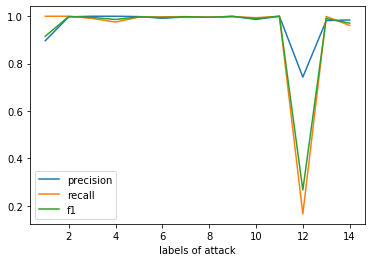

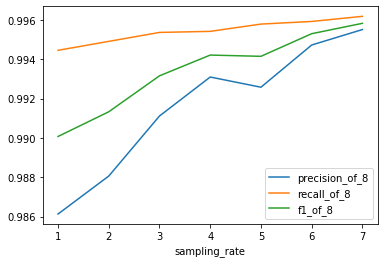

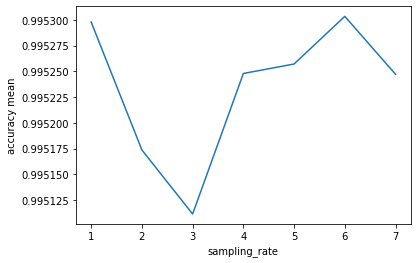

The sampling rate of the Dos_Slowhttptest attack is： 8
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (712166,)
Number of examples in the test set: (79139,)
accuracy_mean value is : 0.9952422408850549
precision_mean[7],recall_mean[7],f1_mean[7] 0.994083436618521 0.996181107906709 0.9951032046267777
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364, 0.9951032046267777]


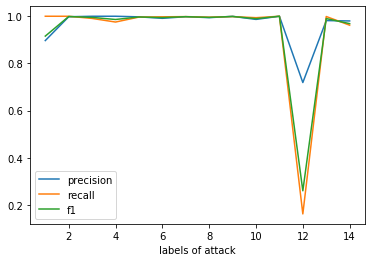

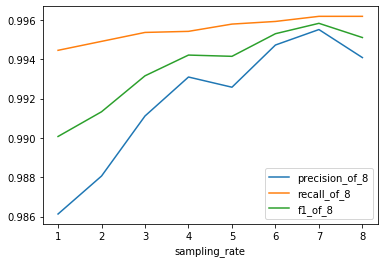

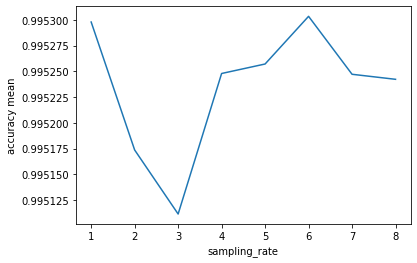

The sampling rate of the Dos_Slowhttptest attack is： 9
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (717116,)
Number of examples in the test set: (79688,)
accuracy_mean value is : 0.9951332266697342
precision_mean[7],recall_mean[7],f1_mean[7] 0.9961827501174749 0.996326604837243 0.9962400479113322
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364, 0.9951032046267777, 0.9962400479113322]


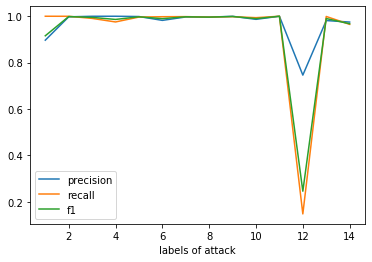

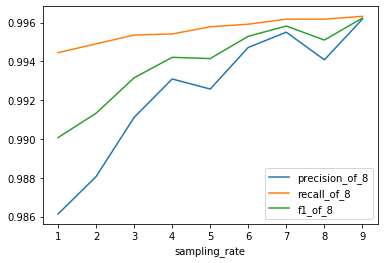

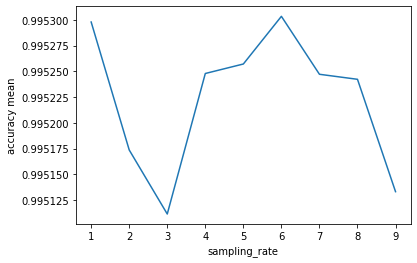

The sampling rate of the Dos_Slowhttptest attack is： 10
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (722065,)
Number of examples in the test set: (80238,)
accuracy_mean value is : 0.9953136669817713
precision_mean[7],recall_mean[7],f1_mean[7] 0.9964601079330162 0.9964125645849897 0.9964243316585619
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364, 0.9951032046267777, 0.9962400479113322, 0.9964243316585619]


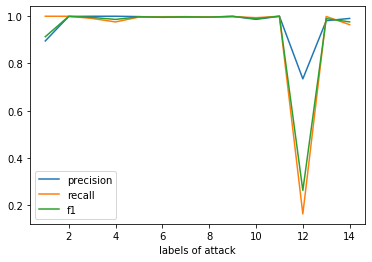

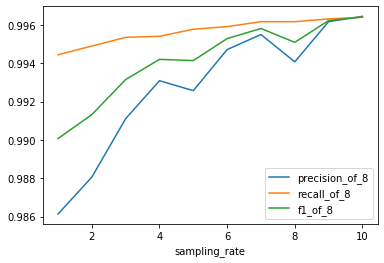

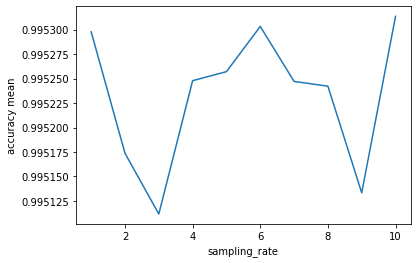

The sampling rate of the Dos_Slowhttptest attack is： 11
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (727014,)
Number of examples in the test set: (80788,)
accuracy_mean value is : 0.9953208129041817
precision_mean[7],recall_mean[7],f1_mean[7] 0.9967494790863132 0.9965145177783052 0.9966217705211843
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364, 0.9951032046267777, 0.9962400479113322, 0.9964243316585619, 0.9966217705211843]


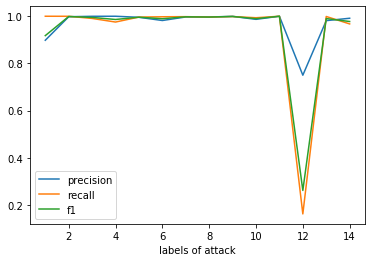

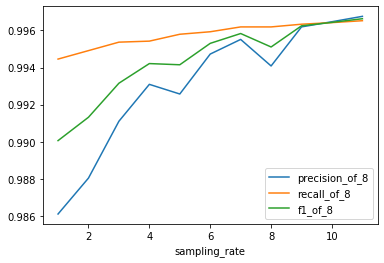

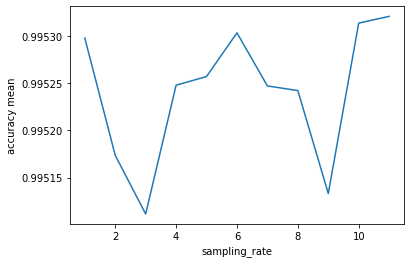

The sampling rate of the Dos_Slowhttptest attack is： 12
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (731963,)
Number of examples in the test set: (81338,)
accuracy_mean value is : 0.9953106464002968
precision_mean[7],recall_mean[7],f1_mean[7] 0.9965715166801952 0.9965588164408044 0.9965545890774544
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364, 0.9951032046267777, 0.9962400479113322, 0.9964243316585619, 

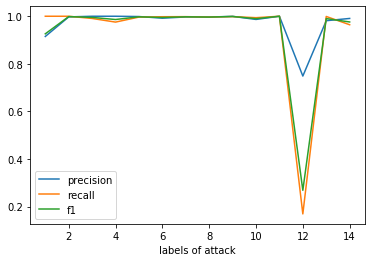

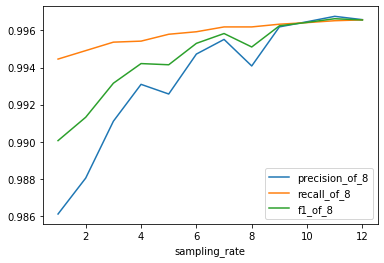

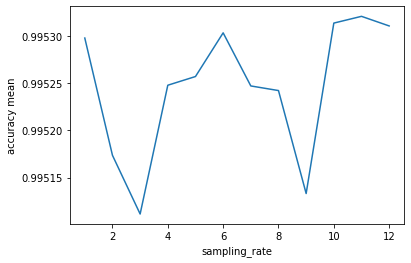

The sampling rate of the Dos_Slowhttptest attack is： 13
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (736912,)
Number of examples in the test set: (81888,)
accuracy_mean value is : 0.9952896245922525
precision_mean[7],recall_mean[7],f1_mean[7] 0.9966851741517061 0.9965448219311346 0.9966054448088973
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.9958259882397364, 0.9951032046267777, 

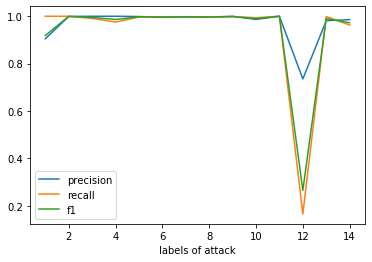

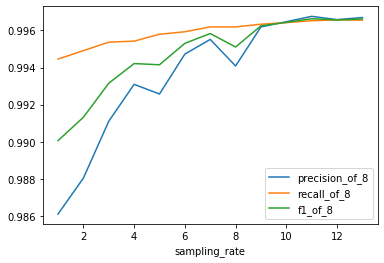

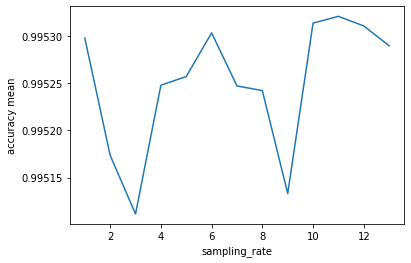

The sampling rate of the Dos_Slowhttptest attack is： 14
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (741861,)
Number of examples in the test set: (82438,)
accuracy_mean value is : 0.9952785897171681
precision_mean[7],recall_mean[7],f1_mean[7] 0.9968321967439252 0.996617570492335 0.9967161512542159
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0.9941478876562156, 0.9952980271532679, 0.

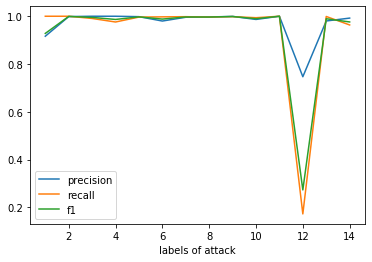

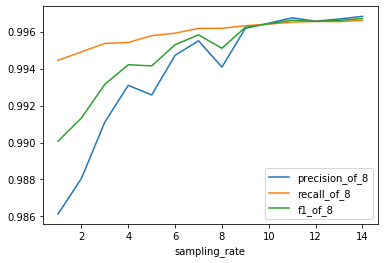

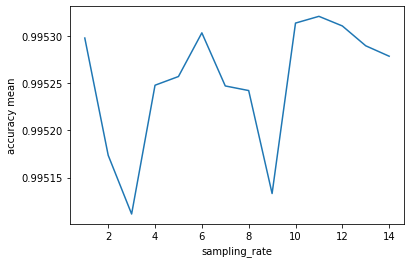

The sampling rate of the Dos_Slowhttptest attack is： 15
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (746810,)
Number of examples in the test set: (82988,)
accuracy_mean value is : 0.9953532668926641
precision_mean[7],recall_mean[7],f1_mean[7] 0.9971052328541475 0.9966812085555713 0.9968861141714294
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335, 0.9966812085555713] [0.9900727595764849, 0.9913287974758314, 0.9931567882204234, 0.9942117126868176, 0

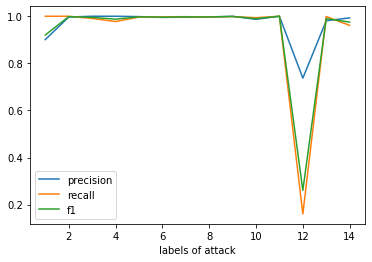

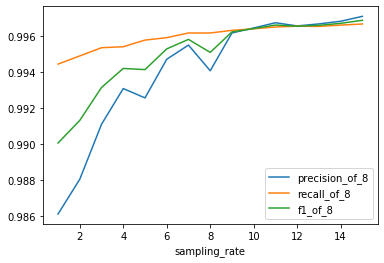

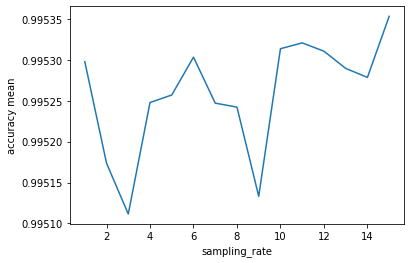

The sampling rate of the Dos_Slowhttptest attack is： 16
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (751759,)
Number of examples in the test set: (83538,)
accuracy_mean value is : 0.9954221704998399
precision_mean[7],recall_mean[7],f1_mean[7] 0.9973058874827183 0.9967373626875078 0.9970150580713835
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335, 0.9966812085555713, 0.9967373626875078] [0.9900727595764849, 0.9913287974758314, 0

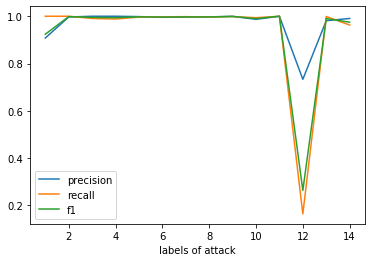

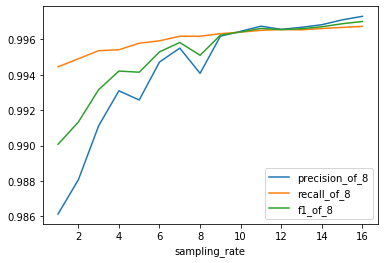

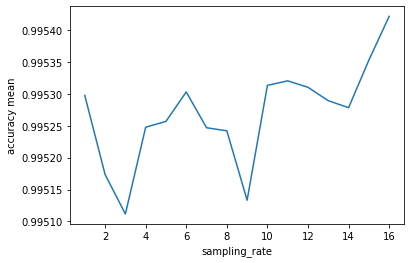

The sampling rate of the Dos_Slowhttptest attack is： 17
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (756708,)
Number of examples in the test set: (84088,)
accuracy_mean value is : 0.9953795609119002
precision_mean[7],recall_mean[7],f1_mean[7] 0.9975540201898946 0.9968479021426162 0.9971953613482434
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335, 0.9966812085555713, 0.9967373626875078, 0.9968479021426162] [0

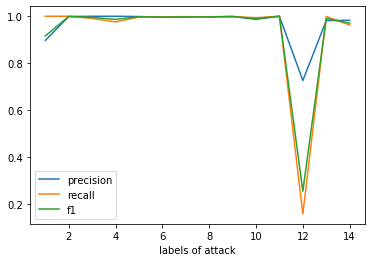

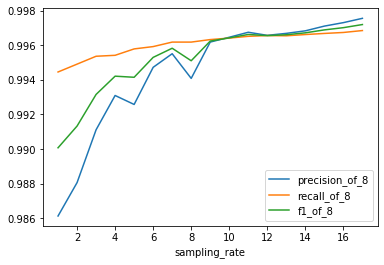

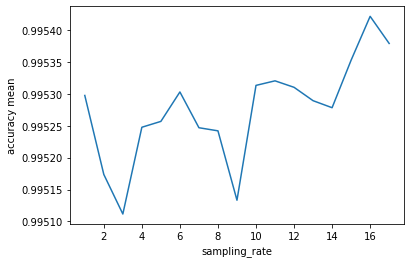

The sampling rate of the Dos_Slowhttptest attack is： 18
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (761657,)
Number of examples in the test set: (84638,)
accuracy_mean value is : 0.9954379436999433
precision_mean[7],recall_mean[7],f1_mean[7] 0.9977191900016411 0.9968702409588935 0.9972897839273689
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335, 0.9966812085555713, 0.9967373626875078, 0.

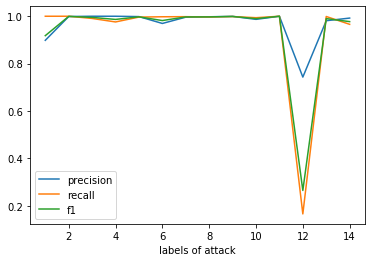

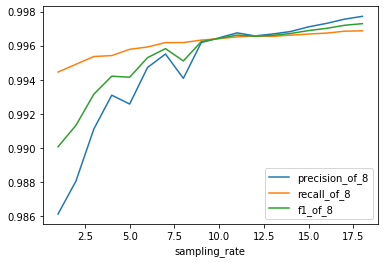

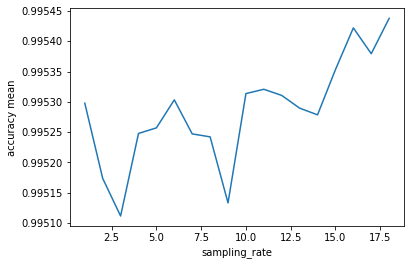

The sampling rate of the Dos_Slowhttptest attack is： 19
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (766607,)
Number of examples in the test set: (85187,)
accuracy_mean value is : 0.995415716658915
precision_mean[7],recall_mean[7],f1_mean[7] 0.9978774672883303 0.9969448990725587 0.9974066857925695
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335, 0.9966812085555713, 0.9

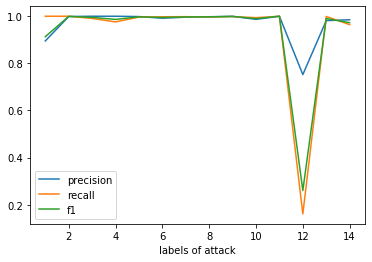

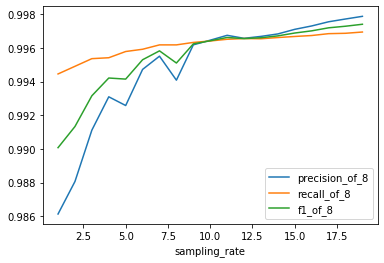

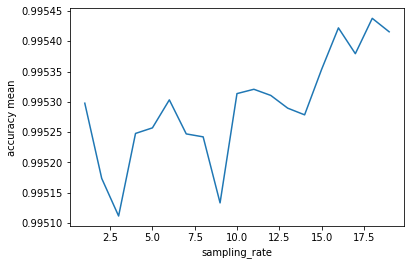

The sampling rate of the Dos_Slowhttptest attack is： 20
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (771556,)
Number of examples in the test set: (85737,)
accuracy_mean value is : 0.9954882787621054
precision_mean[7],recall_mean[7],f1_mean[7] 0.9979000176419689 0.9969691436534633 0.9974305149984966
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.996617570492335, 0.

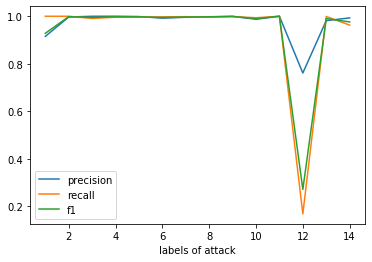

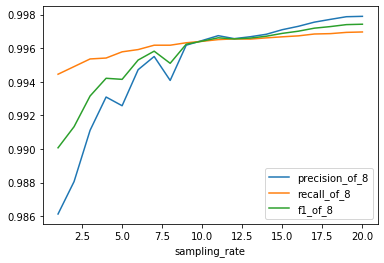

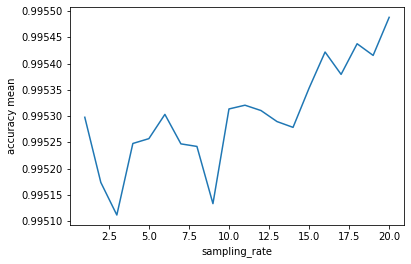

The sampling rate of the Dos_Slowhttptest attack is： 21
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (776505,)
Number of examples in the test set: (86287,)
accuracy_mean value is : 0.9953941747822359
precision_mean[7],recall_mean[7],f1_mean[7] 0.9980681202395741 0.996949857145401 0.9975052831413931
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0.9965448219311346, 0.

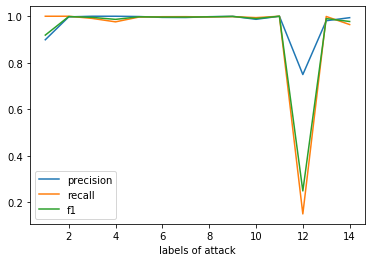

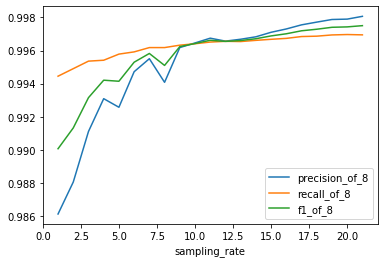

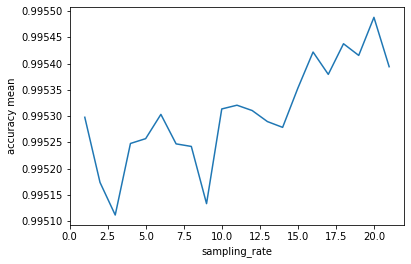

The sampling rate of the Dos_Slowhttptest attack is： 22
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (781454,)
Number of examples in the test set: (86837,)
accuracy_mean value is : 0.9954256513959633
precision_mean[7],recall_mean[7],f1_mean[7] 0.9980264069391666 0.9970192184439768 0.9975191764373379
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0.9965588164408044, 0

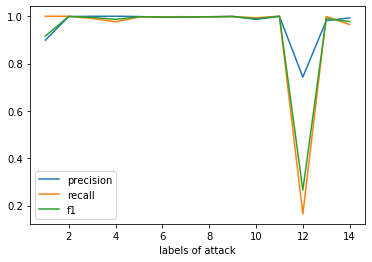

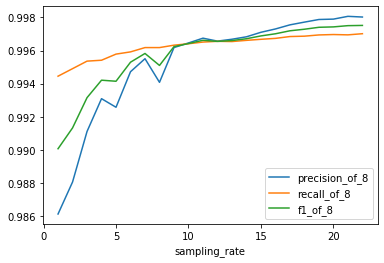

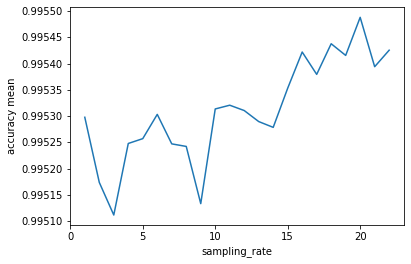

The sampling rate of the Dos_Slowhttptest attack is： 23
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (786403,)
Number of examples in the test set: (87387,)
accuracy_mean value is : 0.9954201057461353
precision_mean[7],recall_mean[7],f1_mean[7] 0.9977147237968197 0.9970070275584062 0.9973575438344169
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0.9965145177783052, 0

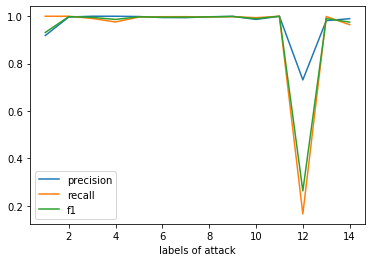

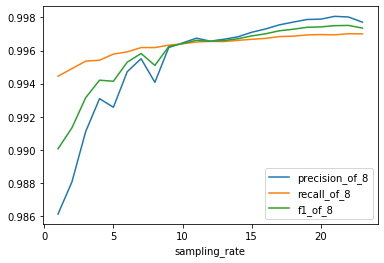

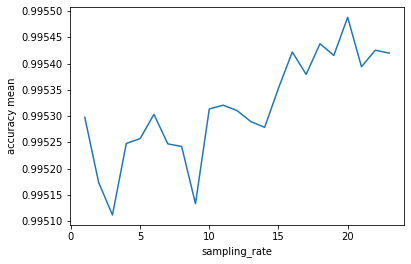

The sampling rate of the Dos_Slowhttptest attack is： 24
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (791352,)
Number of examples in the test set: (87937,)
accuracy_mean value is : 0.9955317757775795
precision_mean[7],recall_mean[7],f1_mean[7] 0.9979891794077107 0.9970685528891229 0.9975250971119436
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0.9964125645849897, 0

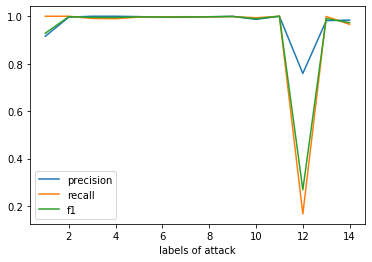

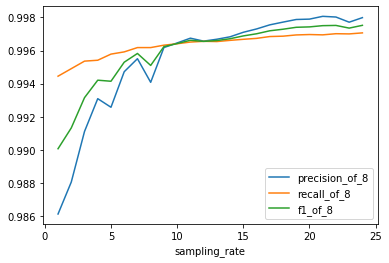

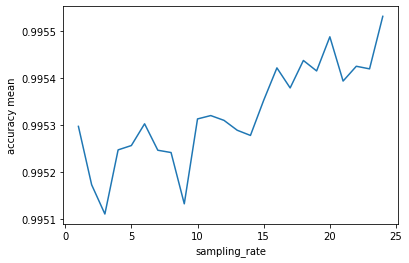

The sampling rate of the Dos_Slowhttptest attack is： 25
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (796301,)
Number of examples in the test set: (88487,)
accuracy_mean value is : 0.9955030354615235
precision_mean[7],recall_mean[7],f1_mean[7] 0.9982248421657612 0.9971393387446046 0.9976791052528956
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 0.996326604837243, 0

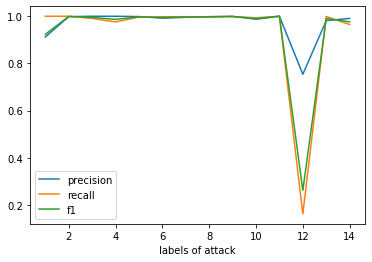

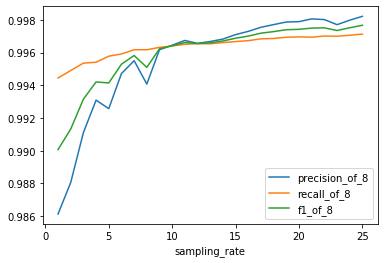

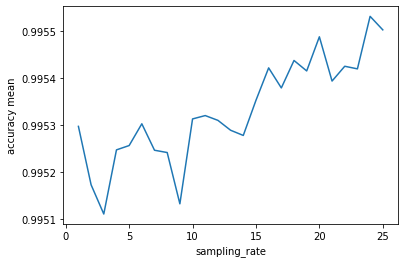

The sampling rate of the Dos_Slowhttptest attack is： 26
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (801250,)
Number of examples in the test set: (89037,)
accuracy_mean value is : 0.9954937460422922
precision_mean[7],recall_mean[7],f1_mean[7] 0.9981368455329447 0.9971240539095035 0.9976272868843029
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347, 0.996181107906709, 

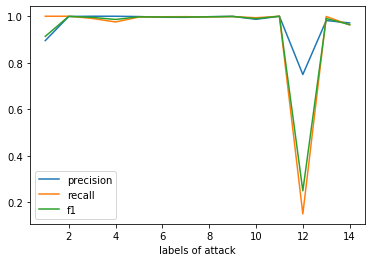

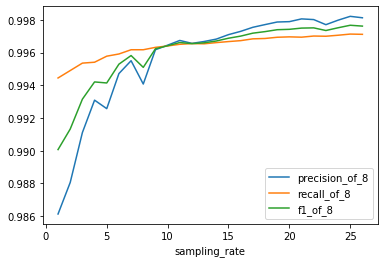

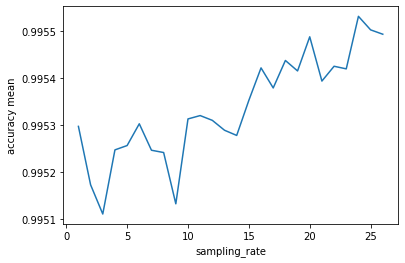

The sampling rate of the Dos_Slowhttptest attack is： 27
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (806199,)
Number of examples in the test set: (89587,)
accuracy_mean value is : 0.9955001998299714
precision_mean[7],recall_mean[7],f1_mean[7] 0.9980329980894286 0.9971358385763001 0.9975818566942418
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777, 0.9961810948769347,

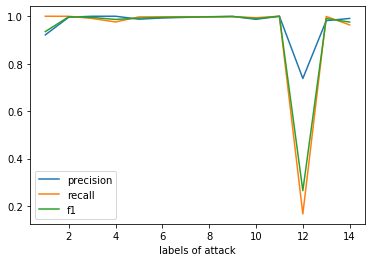

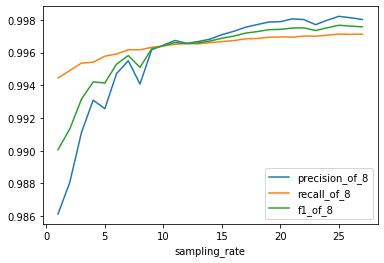

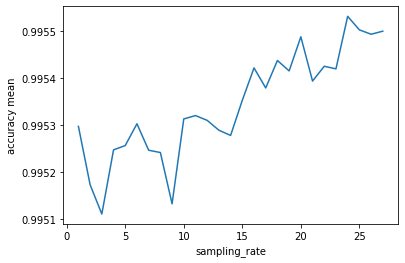

The sampling rate of the Dos_Slowhttptest attack is： 28
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (811148,)
Number of examples in the test set: (90137,)
accuracy_mean value is : 0.9955332032454395
precision_mean[7],recall_mean[7],f1_mean[7] 0.9984195474346302 0.9971405441202439 0.9977775317079786
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0.9959213018729777,

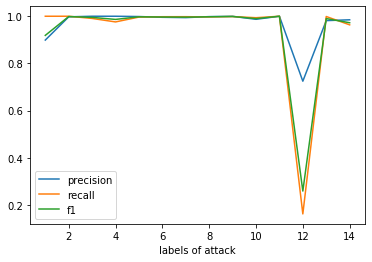

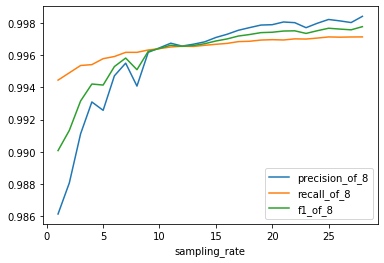

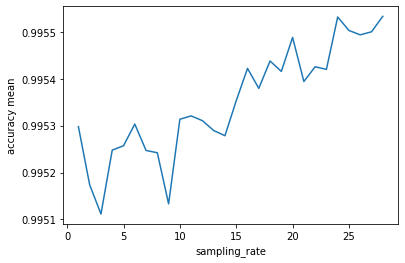

The sampling rate of the Dos_Slowhttptest attack is： 29
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (816098,)
Number of examples in the test set: (90686,)
accuracy_mean value is : 0.9955315987387612
precision_mean[7],recall_mean[7],f1_mean[7] 0.998339765653984 0.9971509971509971 0.9977427682364797
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 0.9957870612766035, 0

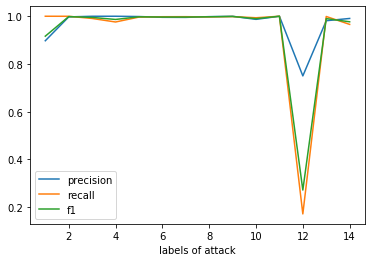

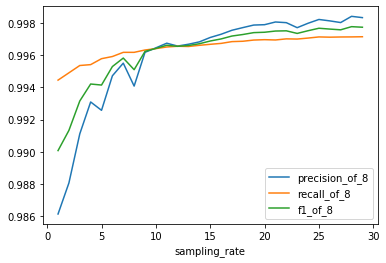

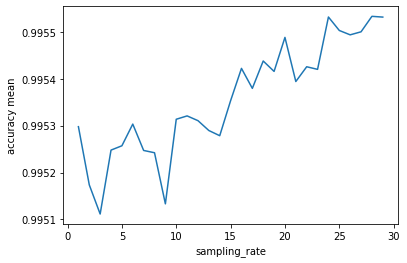

The sampling rate of the Dos_Slowhttptest attack is： 30
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (821047,)
Number of examples in the test set: (91236,)
accuracy_mean value is : 0.9954839887330909
precision_mean[7],recall_mean[7],f1_mean[7] 0.9983751044267606 0.9971842380874086 0.9977772996223685
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.9954173616852409, 

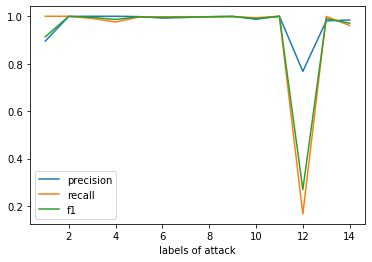

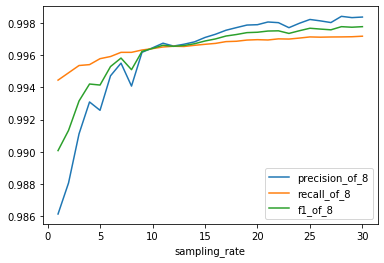

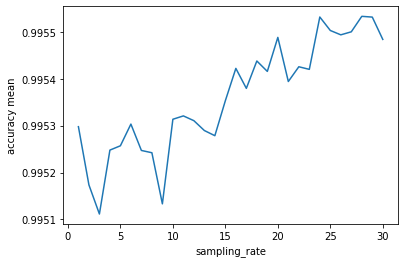

The sampling rate of the Dos_Slowhttptest attack is： 31
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (825996,)
Number of examples in the test set: (91786,)
accuracy_mean value is : 0.9955982224081348
precision_mean[7],recall_mean[7],f1_mean[7] 0.998493816192887 0.9971756219993637 0.9978323210252992
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887] [0.9944535528166101, 0.9949080250656964, 0.995362747529869, 0.

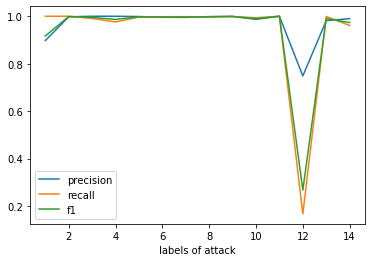

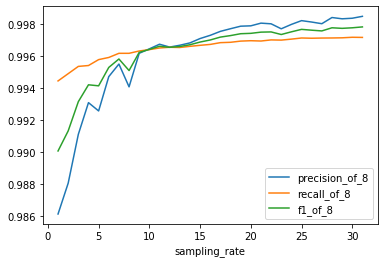

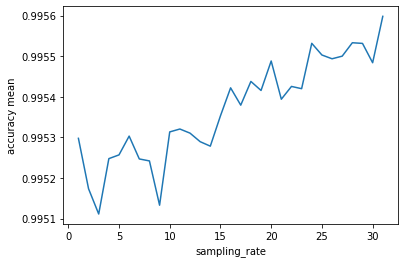

The sampling rate of the Dos_Slowhttptest attack is： 32
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (830945,)
Number of examples in the test set: (92336,)
accuracy_mean value is : 0.9956547665808397
precision_mean[7],recall_mean[7],f1_mean[7] 0.9984679881054106 0.9972116132593408 0.9978374864375649
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106] [0.9944535528166101, 0.9949080250656964, 

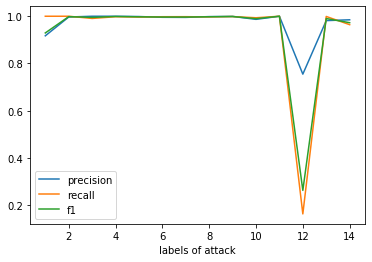

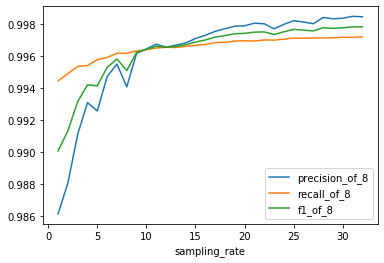

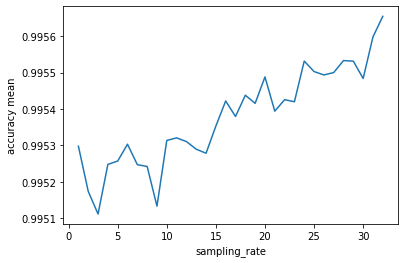

The sampling rate of the Dos_Slowhttptest attack is： 33
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (835894,)
Number of examples in the test set: (92886,)
accuracy_mean value is : 0.9956040495729445
precision_mean[7],recall_mean[7],f1_mean[7] 0.9983853233845918 0.9972294425556271 0.9978050178973131
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918] [0.9944535528166101, 

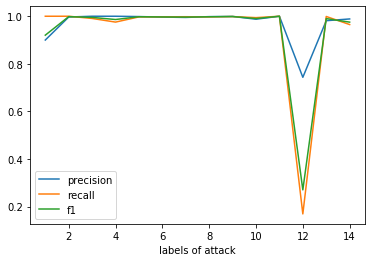

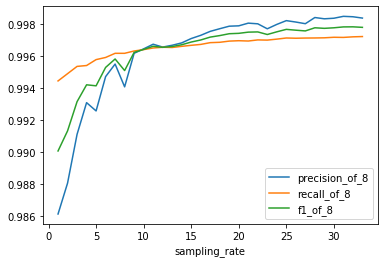

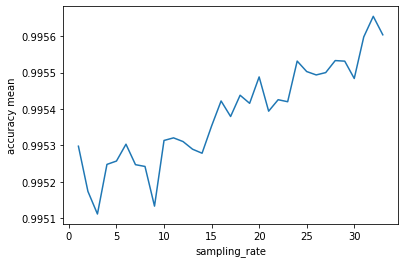

The sampling rate of the Dos_Slowhttptest attack is： 34
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (840843,)
Number of examples in the test set: (93436,)
accuracy_mean value is : 0.9956010245798257
precision_mean[7],recall_mean[7],f1_mean[7] 0.9986688426683298 0.9972618396782043 0.9979632397972205
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298] [

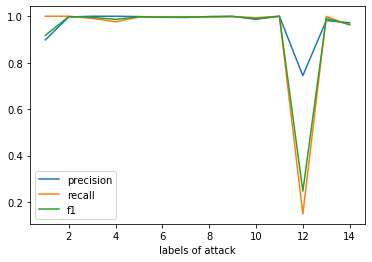

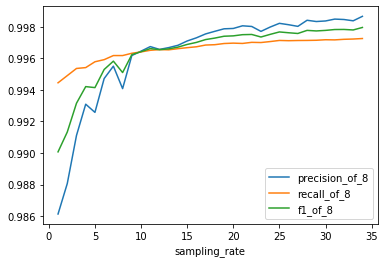

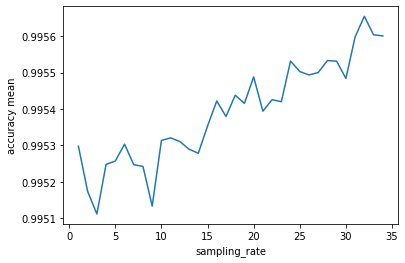

The sampling rate of the Dos_Slowhttptest attack is： 35
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (845792,)
Number of examples in the test set: (93986,)
accuracy_mean value is : 0.995644856413386
precision_mean[7],recall_mean[7],f1_mean[7] 0.998625178696463 0.997287383338134 0.9979542594056288
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.99

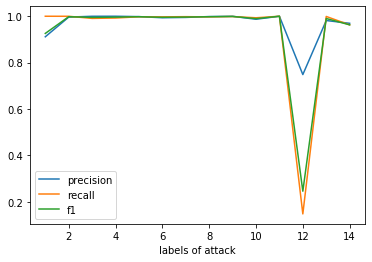

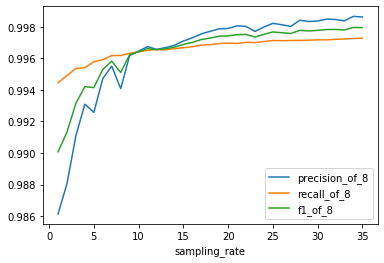

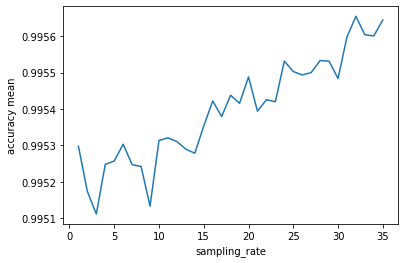

The sampling rate of the Dos_Slowhttptest attack is： 36
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (850741,)
Number of examples in the test set: (94536,)
accuracy_mean value is : 0.9956765417952838
precision_mean[7],recall_mean[7],f1_mean[7] 0.99852564970057 0.9972525691345977 0.9978868810912426
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.9

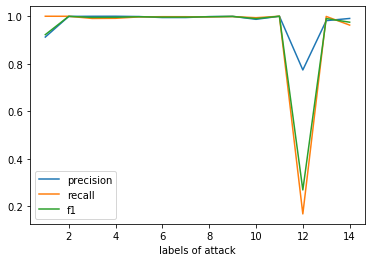

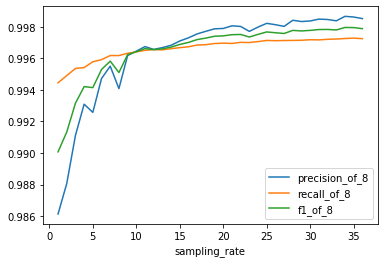

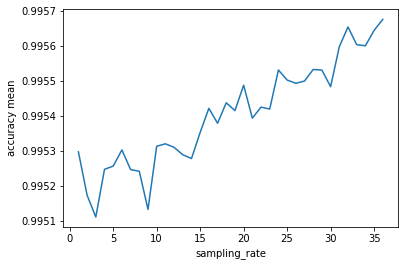

The sampling rate of the Dos_Slowhttptest attack is： 37
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (855690,)
Number of examples in the test set: (95086,)
accuracy_mean value is : 0.995683669353928
precision_mean[7],recall_mean[7],f1_mean[7] 0.9986164747594921 0.9973057287160147 0.9979590684695594
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.

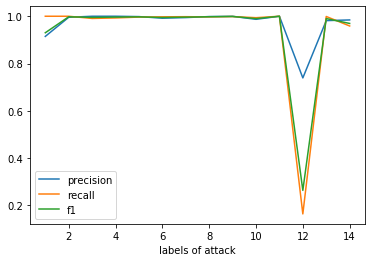

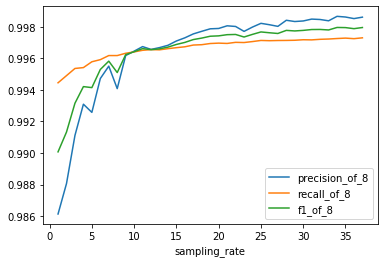

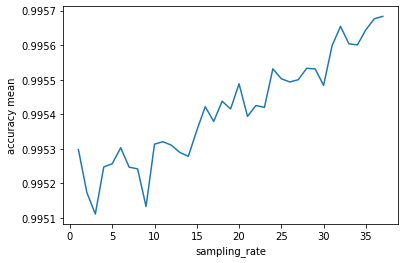

The sampling rate of the Dos_Slowhttptest attack is： 38
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (860639,)
Number of examples in the test set: (95636,)
accuracy_mean value is : 0.9956708448623403
precision_mean[7],recall_mean[7],f1_mean[7] 0.9987024469408323 0.9972675683313481 0.9979831138055124
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

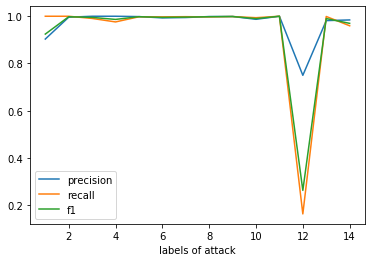

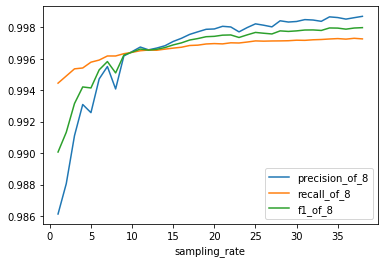

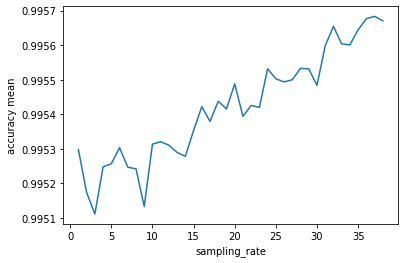

The sampling rate of the Dos_Slowhttptest attack is： 39
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (865589,)
Number of examples in the test set: (96185,)
accuracy_mean value is : 0.9956768639694706
precision_mean[7],recall_mean[7],f1_mean[7] 0.9987710106927338 0.9973086015639205 0.9980379976043532
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

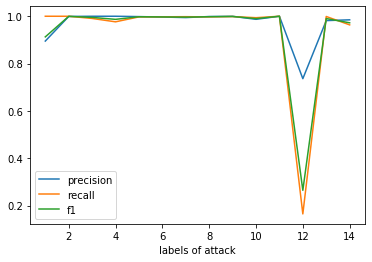

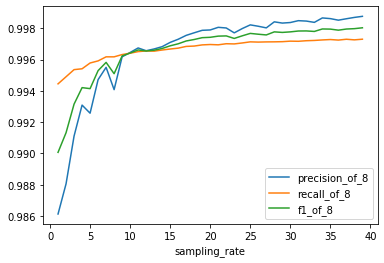

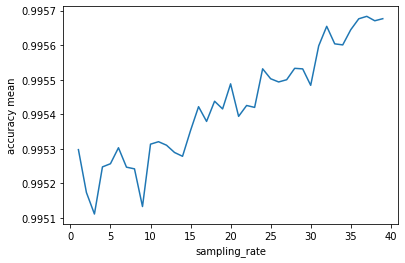

The sampling rate of the Dos_Slowhttptest attack is： 40
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (870538,)
Number of examples in the test set: (96735,)
accuracy_mean value is : 0.9956993707663029
precision_mean[7],recall_mean[7],f1_mean[7] 0.9988006012276115 0.997321019571195 0.9980591408529442
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.

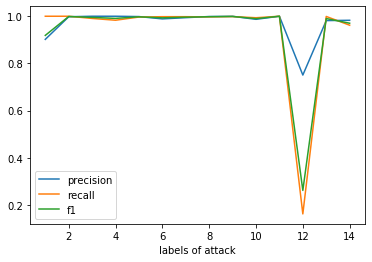

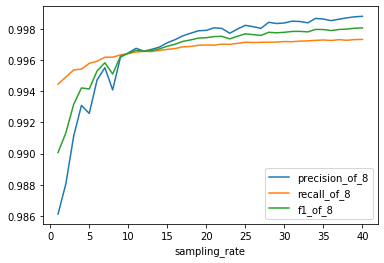

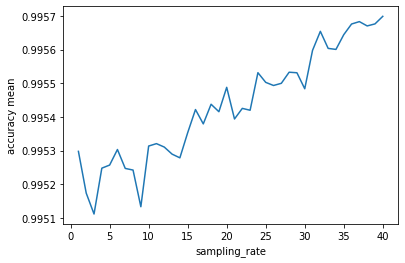

The sampling rate of the Dos_Slowhttptest attack is： 41
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (875487,)
Number of examples in the test set: (97285,)
accuracy_mean value is : 0.9956332175000417
precision_mean[7],recall_mean[7],f1_mean[7] 0.9989241019600792 0.997306869346526 0.9981137818426845
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.

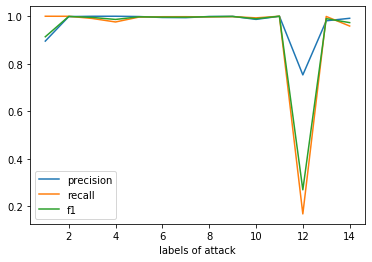

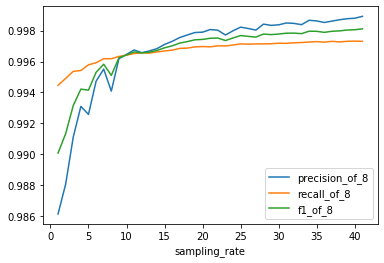

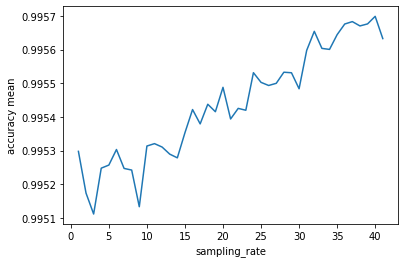

The sampling rate of the Dos_Slowhttptest attack is： 42
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (880436,)
Number of examples in the test set: (97835,)
accuracy_mean value is : 0.9956536755885532
precision_mean[7],recall_mean[7],f1_mean[7] 0.9987341277115934 0.9973398955879265 0.9980353160178078
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

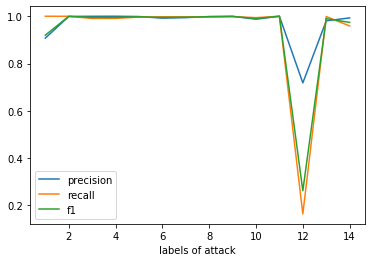

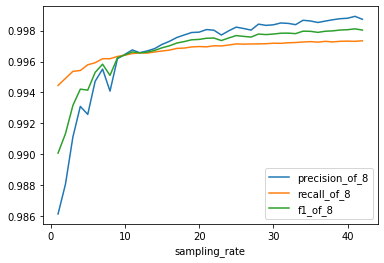

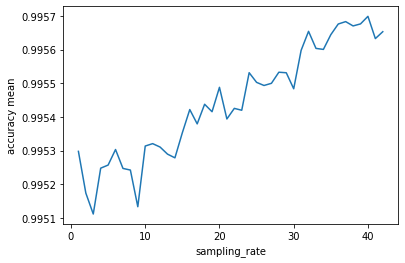

The sampling rate of the Dos_Slowhttptest attack is： 43
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (885385,)
Number of examples in the test set: (98385,)
accuracy_mean value is : 0.995754213488896
precision_mean[7],recall_mean[7],f1_mean[7] 0.9989275436186983 0.997350757202212 0.9981375379238919
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.9

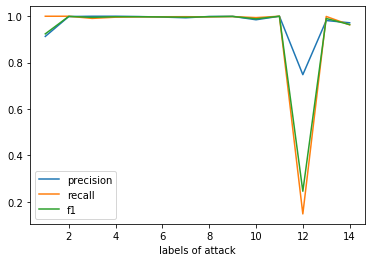

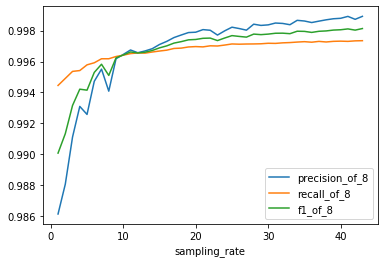

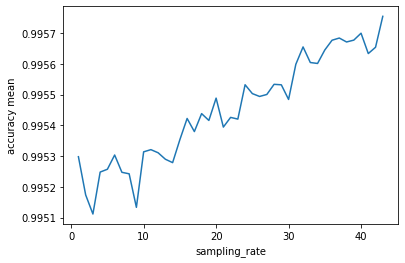

The sampling rate of the Dos_Slowhttptest attack is： 44
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (890334,)
Number of examples in the test set: (98935,)
accuracy_mean value is : 0.9956838034828414
precision_mean[7],recall_mean[7],f1_mean[7] 0.9988827915305938 0.9973449720569348 0.9981122639279933
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

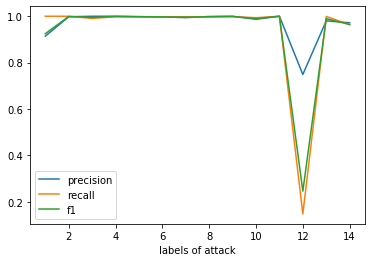

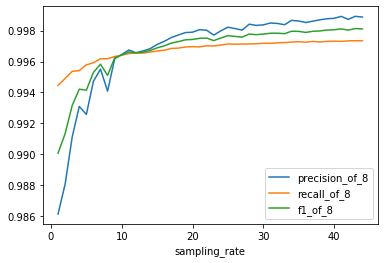

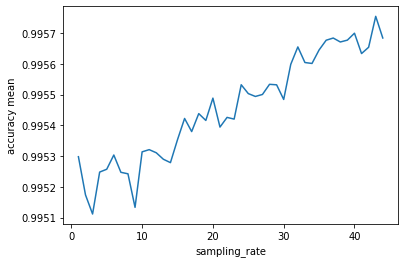

The sampling rate of the Dos_Slowhttptest attack is： 45
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (895283,)
Number of examples in the test set: (99485,)
accuracy_mean value is : 0.9957056541492296
precision_mean[7],recall_mean[7],f1_mean[7] 0.9987882984033127 0.9974026893785524 0.9980940662153694
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

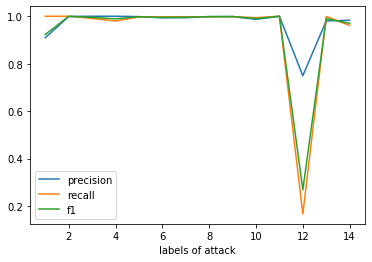

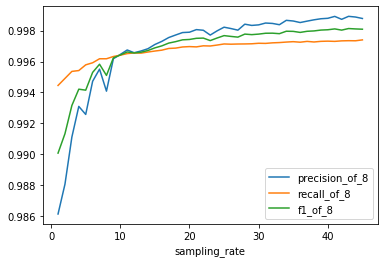

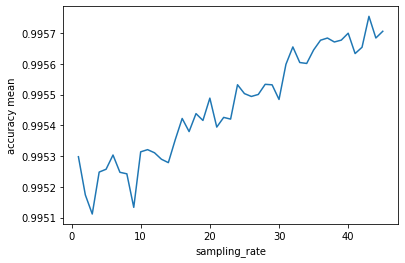

The sampling rate of the Dos_Slowhttptest attack is： 46
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (900232,)
Number of examples in the test set: (100035,)
accuracy_mean value is : 0.9957962486265348
precision_mean[7],recall_mean[7],f1_mean[7] 0.9989495693034304 0.9973844353358233 0.9981654191828596
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

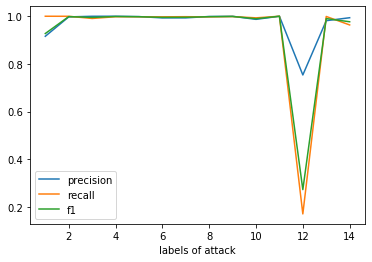

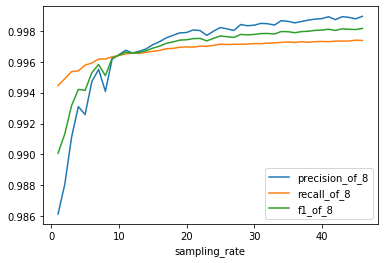

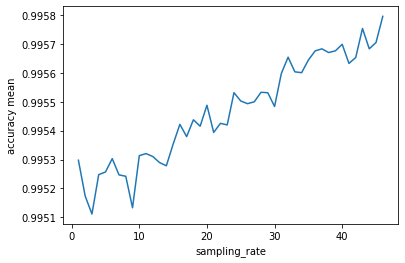

The sampling rate of the Dos_Slowhttptest attack is： 47
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (905181,)
Number of examples in the test set: (100585,)
accuracy_mean value is : 0.9957287543117491
precision_mean[7],recall_mean[7],f1_mean[7] 0.9989636337238263 0.997351789971105 0.9981561824875728
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

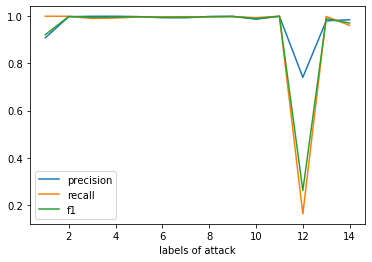

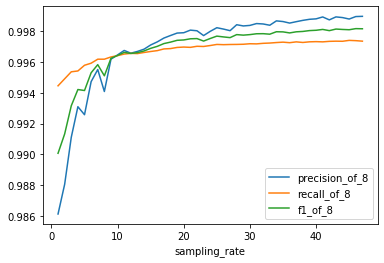

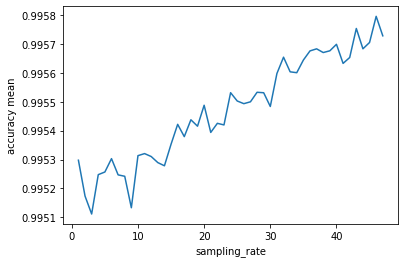

The sampling rate of the Dos_Slowhttptest attack is： 48
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (910130,)
Number of examples in the test set: (101135,)
accuracy_mean value is : 0.9958004368959121
precision_mean[7],recall_mean[7],f1_mean[7] 0.9990141265839247 0.9973761459401211 0.9981936948252965
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

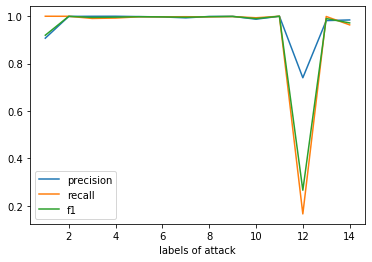

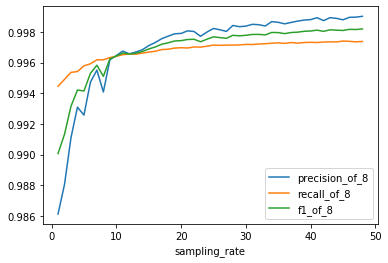

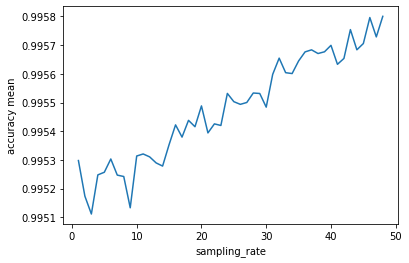

The sampling rate of the Dos_Slowhttptest attack is： 49
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (915080,)
Number of examples in the test set: (101684,)
accuracy_mean value is : 0.9958241186532846
precision_mean[7],recall_mean[7],f1_mean[7] 0.999070215285335 0.9973740680123658 0.998220652845174
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.

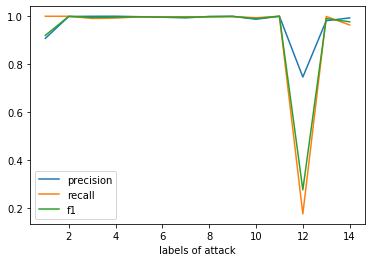

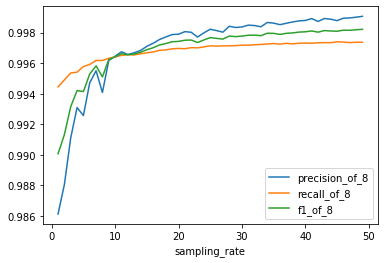

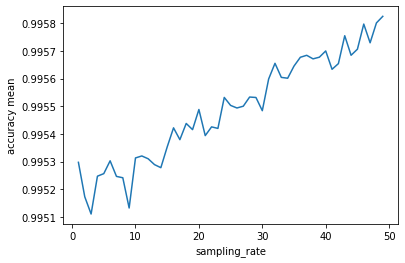

The sampling rate of the Dos_Slowhttptest attack is： 50
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (920029,)
Number of examples in the test set: (102234,)
accuracy_mean value is : 0.9957732108921666
precision_mean[7],recall_mean[7],f1_mean[7] 0.9989319560531177 0.9973792028261933 0.9981541069199731
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

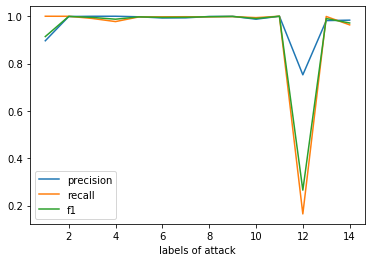

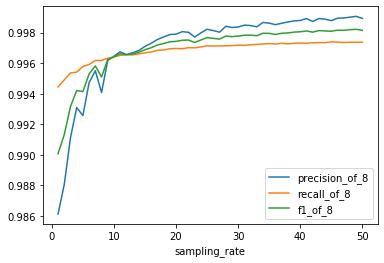

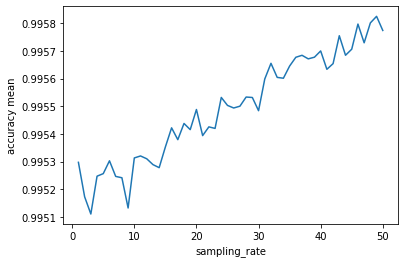

The sampling rate of the Dos_Slowhttptest attack is： 51
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (924978,)
Number of examples in the test set: (102784,)
accuracy_mean value is : 0.995818208955441
precision_mean[7],recall_mean[7],f1_mean[7] 0.9990604723493532 0.9973911345655049 0.9982243733137792
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

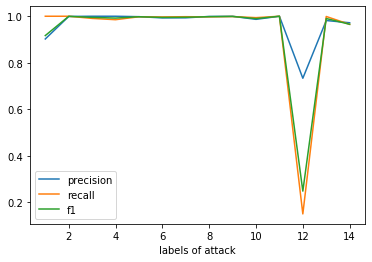

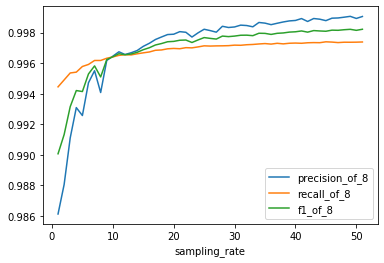

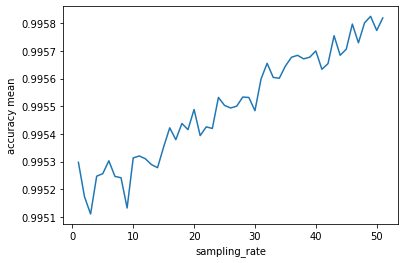

The sampling rate of the Dos_Slowhttptest attack is： 52
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (929927,)
Number of examples in the test set: (103334,)
accuracy_mean value is : 0.9958094955616499
precision_mean[7],recall_mean[7],f1_mean[7] 0.9989926411299246 0.9973957526442019 0.9981927656151658
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

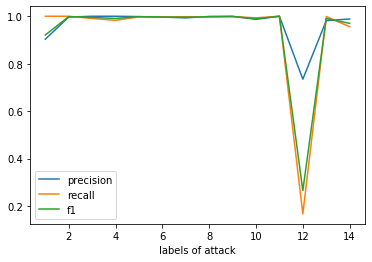

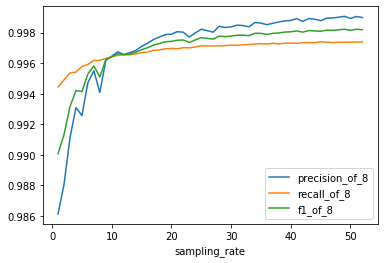

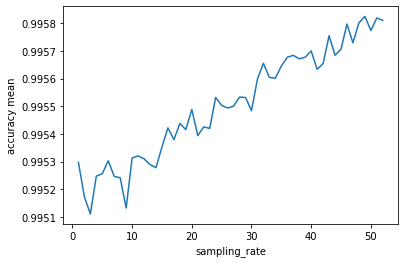

The sampling rate of the Dos_Slowhttptest attack is： 53
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (934876,)
Number of examples in the test set: (103884,)
accuracy_mean value is : 0.9957806559820227
precision_mean[7],recall_mean[7],f1_mean[7] 0.9990818129863571 0.9973867299516753 0.9982328244155404
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

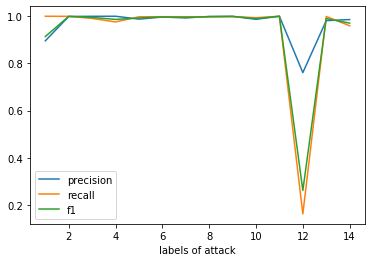

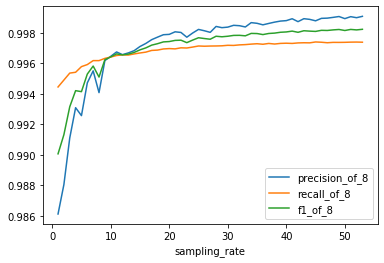

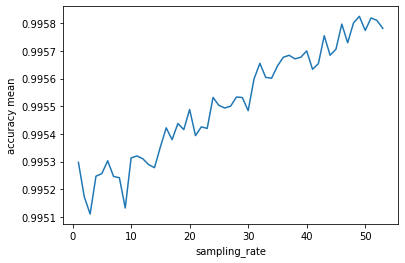

The sampling rate of the Dos_Slowhttptest attack is： 54
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (939825,)
Number of examples in the test set: (104434,)
accuracy_mean value is : 0.9958603359329541
precision_mean[7],recall_mean[7],f1_mean[7] 0.9990983695578143 0.9973615036344394 0.9982285061909627
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

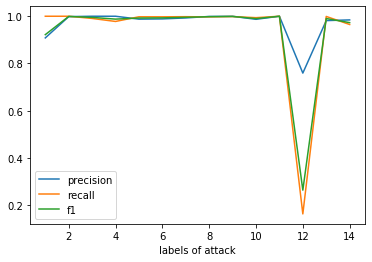

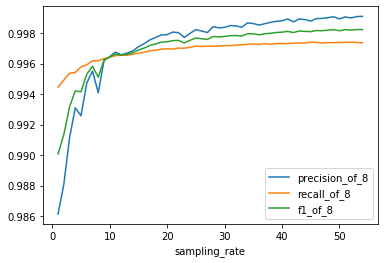

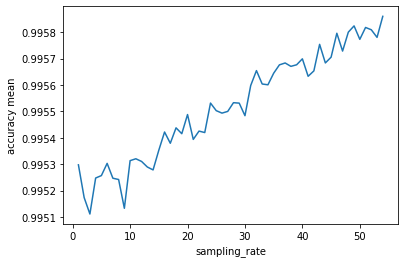

The sampling rate of the Dos_Slowhttptest attack is： 55
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (944774,)
Number of examples in the test set: (104984,)
accuracy_mean value is : 0.995818196922207
precision_mean[7],recall_mean[7],f1_mean[7] 0.999052851852214 0.9973858876045115 0.998217988376175
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0.9

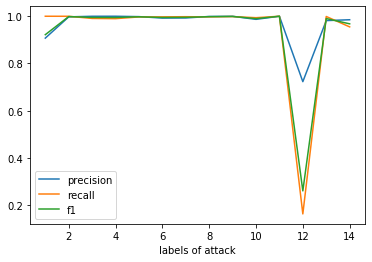

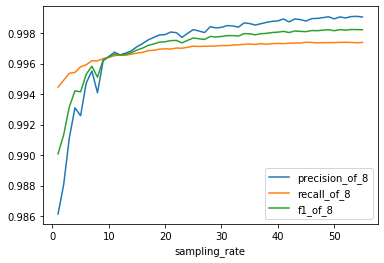

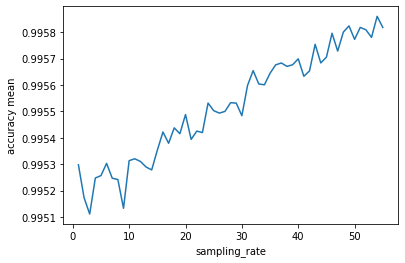

The sampling rate of the Dos_Slowhttptest attack is： 56
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (949723,)
Number of examples in the test set: (105534,)
accuracy_mean value is : 0.9958542041452555
precision_mean[7],recall_mean[7],f1_mean[7] 0.9991044030363387 0.9973838935455511 0.9982427861608454
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

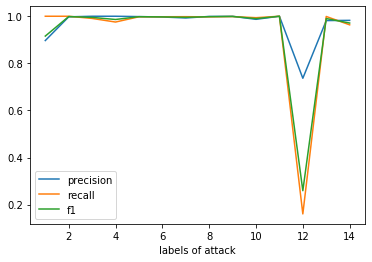

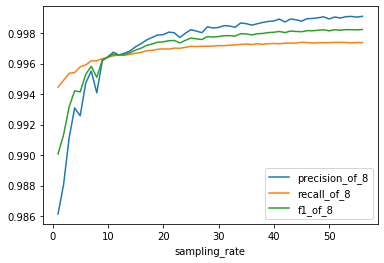

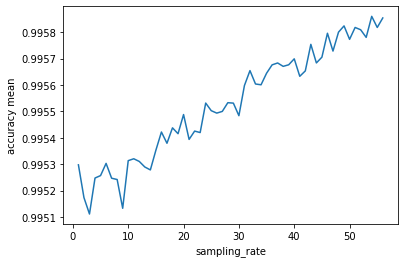

The sampling rate of the Dos_Slowhttptest attack is： 57
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (954672,)
Number of examples in the test set: (106084,)
accuracy_mean value is : 0.9958624987156259
precision_mean[7],recall_mean[7],f1_mean[7] 0.9990729516435553 0.9974070512397368 0.9982386481741111
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

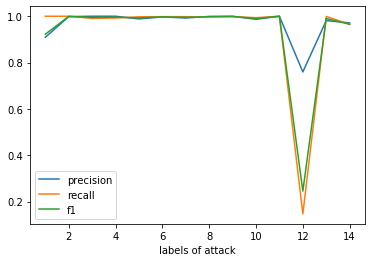

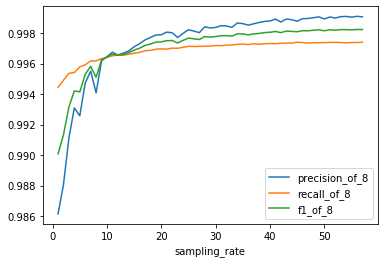

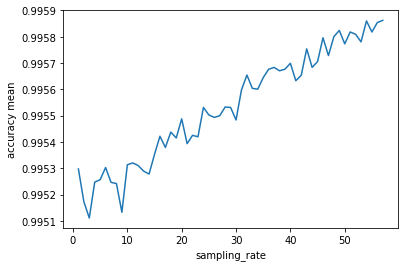

The sampling rate of the Dos_Slowhttptest attack is： 58
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (959621,)
Number of examples in the test set: (106634,)
accuracy_mean value is : 0.995867894237063
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992207632467137 0.9974232601632167 0.9983206822200899
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

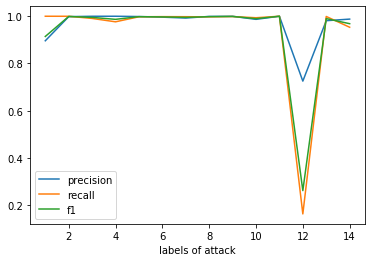

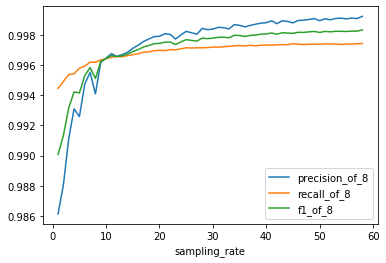

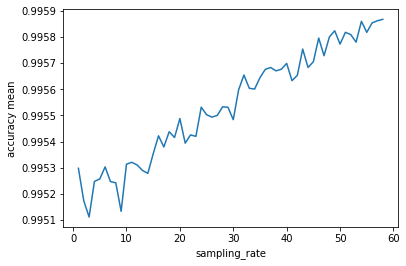

The sampling rate of the Dos_Slowhttptest attack is： 59
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (964571,)
Number of examples in the test set: (107183,)
accuracy_mean value is : 0.9958741532078463
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992064450543147 0.9973813420621932 0.9982925353182661
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

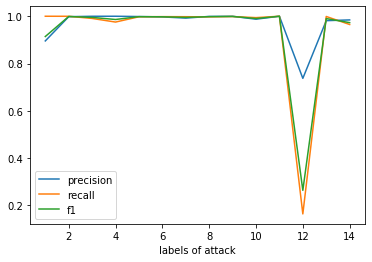

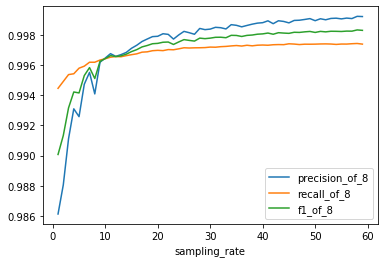

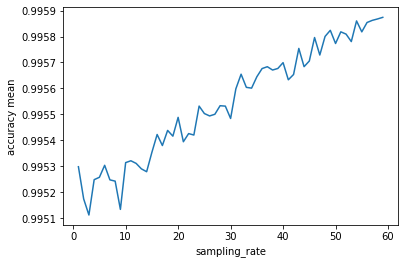

The sampling rate of the Dos_Slowhttptest attack is： 60
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (969520,)
Number of examples in the test set: (107733,)
accuracy_mean value is : 0.9958682924284623
precision_mean[7],recall_mean[7],f1_mean[7] 0.9991957097284209 0.997397440129015 0.9982952265154008
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

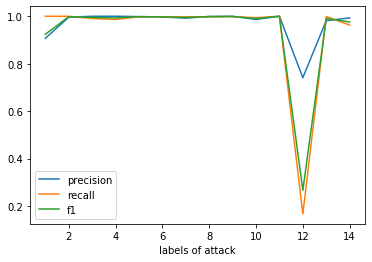

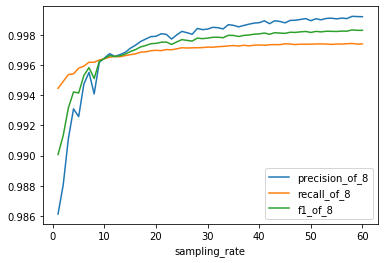

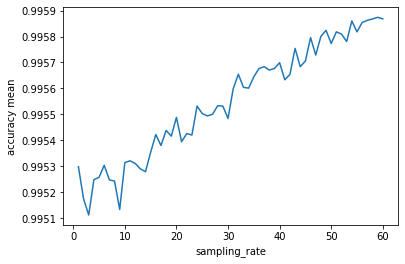

The sampling rate of the Dos_Slowhttptest attack is： 61
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (974469,)
Number of examples in the test set: (108283,)
accuracy_mean value is : 0.9959132909660559
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992584031517786 0.9974012869683431 0.998328487371622
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

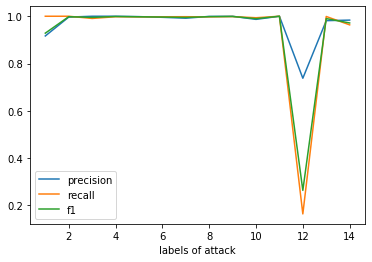

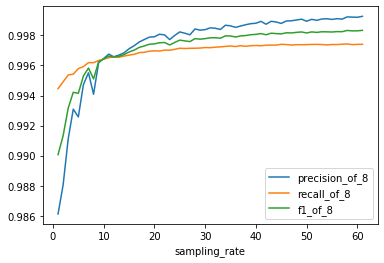

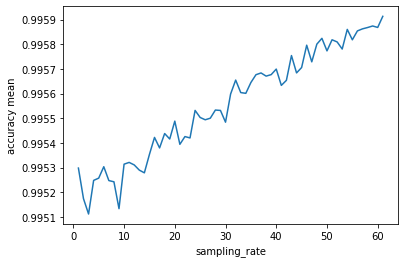

The sampling rate of the Dos_Slowhttptest attack is： 62
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (979418,)
Number of examples in the test set: (108833,)
accuracy_mean value is : 0.9959853937528431
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992701592895248 0.9974281035023432 0.9983478027831305
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

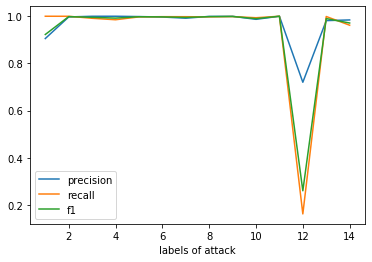

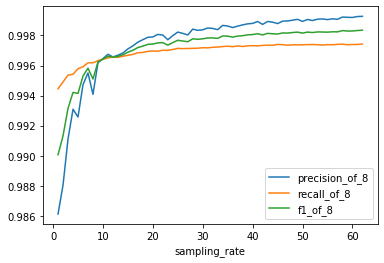

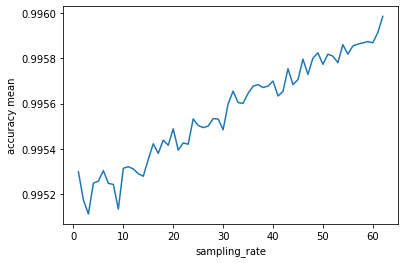

The sampling rate of the Dos_Slowhttptest attack is： 63
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (984367,)
Number of examples in the test set: (109383,)
accuracy_mean value is : 0.9959269580008083
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992985901104625 0.9974285094863312 0.9983622115415673
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

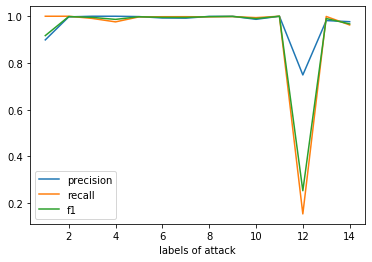

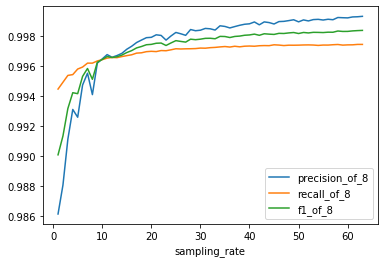

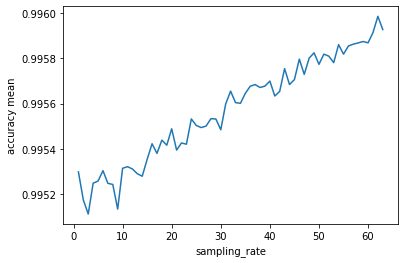

The sampling rate of the Dos_Slowhttptest attack is： 64
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (989316,)
Number of examples in the test set: (109933,)
accuracy_mean value is : 0.9959227721675481
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993205870405572 0.9974149145210793 0.9983663738743175
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

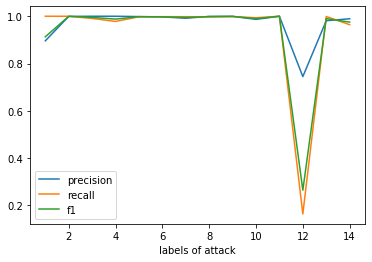

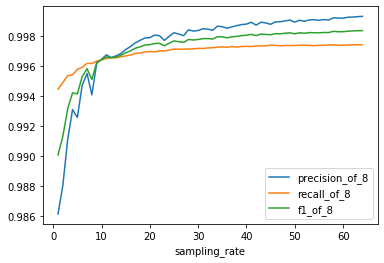

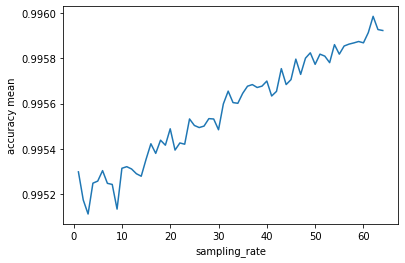

The sampling rate of the Dos_Slowhttptest attack is： 65
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (994265,)
Number of examples in the test set: (110483,)
accuracy_mean value is : 0.995901428644516
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992784122198397 0.9974265287639804 0.9983511702792425
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

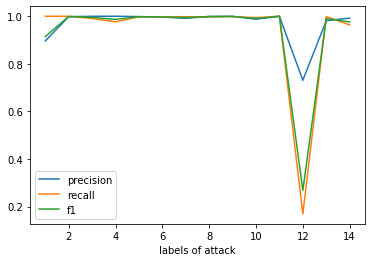

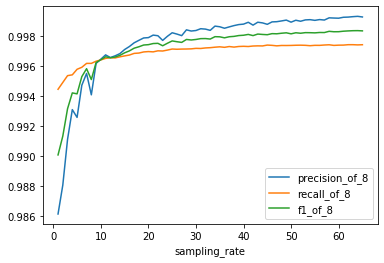

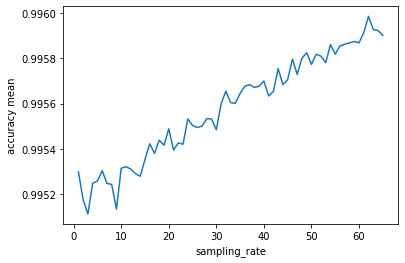

The sampling rate of the Dos_Slowhttptest attack is： 66
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (999214,)
Number of examples in the test set: (111033,)
accuracy_mean value is : 0.995970369606493
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993135762219725 0.9974215116720307 0.9983662345747948
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

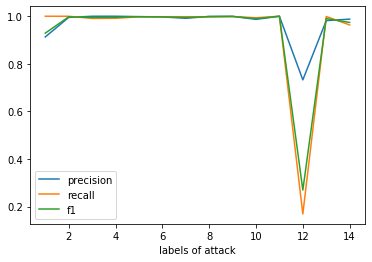

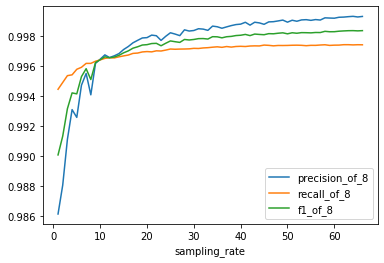

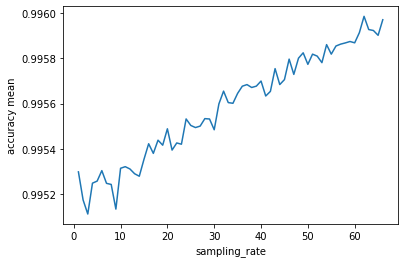

The sampling rate of the Dos_Slowhttptest attack is： 67
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1004163,)
Number of examples in the test set: (111583,)
accuracy_mean value is : 0.9959552764470118
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993503573133943 0.9974300132119615 0.9983888750207524
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

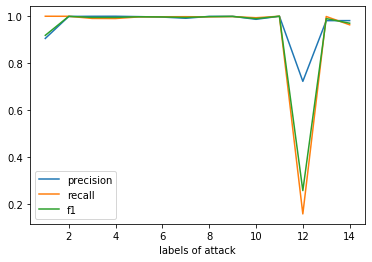

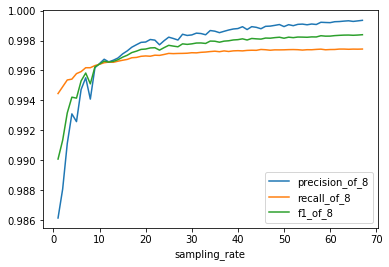

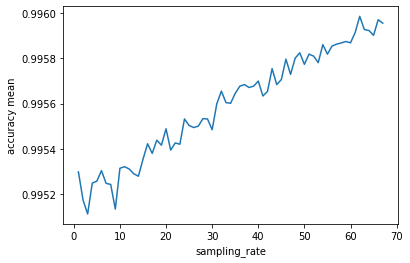

The sampling rate of the Dos_Slowhttptest attack is： 68
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1009112,)
Number of examples in the test set: (112133,)
accuracy_mean value is : 0.9959840325492338
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993149983638986 0.9974356337929111 0.9983740343302537
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

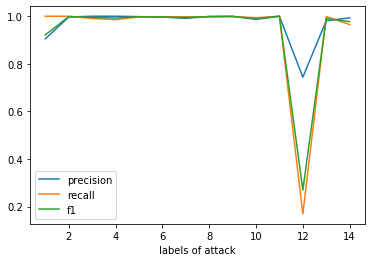

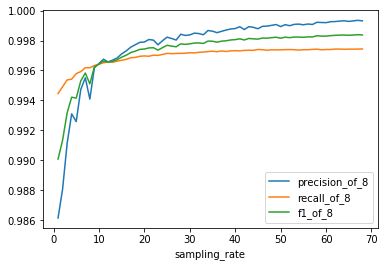

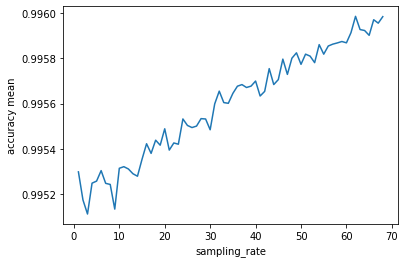

The sampling rate of the Dos_Slowhttptest attack is： 69
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1014062,)
Number of examples in the test set: (112682,)
accuracy_mean value is : 0.9959672318919548
precision_mean[7],recall_mean[7],f1_mean[7] 0.999241439516249 0.997441093185774 0.9983400890825616
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

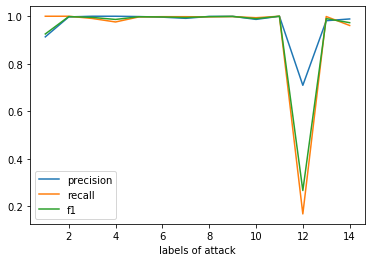

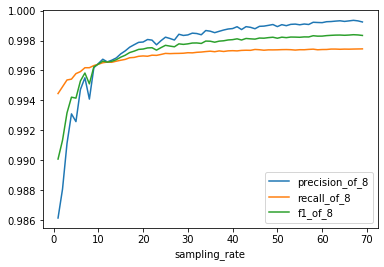

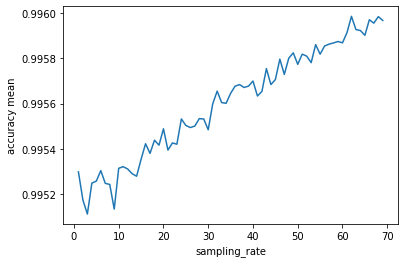

The sampling rate of the Dos_Slowhttptest attack is： 70
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1019011,)
Number of examples in the test set: (113232,)
accuracy_mean value is : 0.9959541365928795
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993316602325775 0.9974284692758285 0.9983787922322664
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

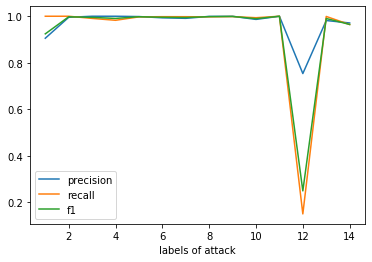

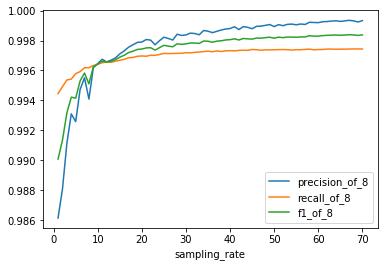

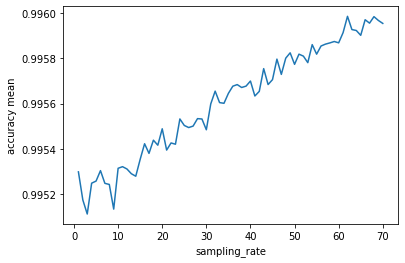

The sampling rate of the Dos_Slowhttptest attack is： 71
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1023960,)
Number of examples in the test set: (113782,)
accuracy_mean value is : 0.9959350189317293
precision_mean[7],recall_mean[7],f1_mean[7] 0.9992501276615622 0.9974288252896437 0.9983382209379744
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

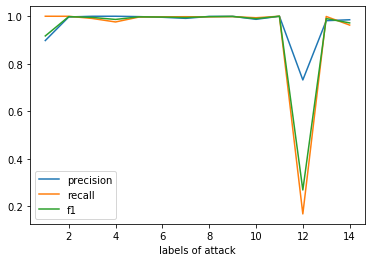

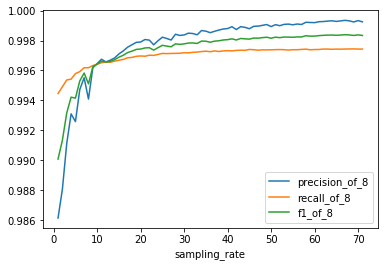

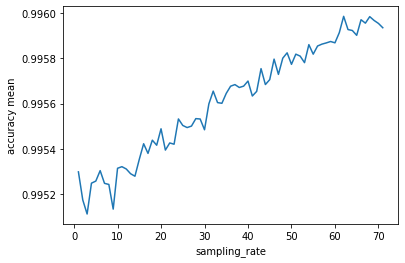

The sampling rate of the Dos_Slowhttptest attack is： 72
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1028909,)
Number of examples in the test set: (114332,)
accuracy_mean value is : 0.9959746918958607
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993524027520237 0.9974441176615038 0.9983970003018348
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

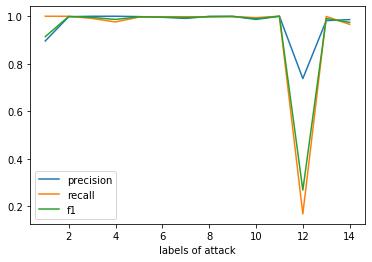

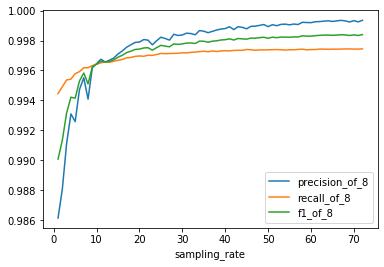

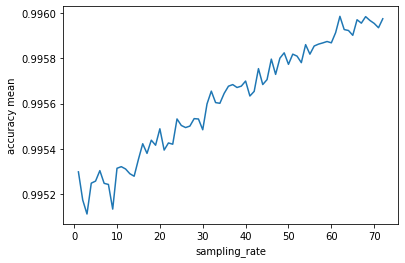

The sampling rate of the Dos_Slowhttptest attack is： 73
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1033858,)
Number of examples in the test set: (114882,)
accuracy_mean value is : 0.9959869973876408
precision_mean[7],recall_mean[7],f1_mean[7] 0.999270387607973 0.9974491673716877 0.9983585334415638
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

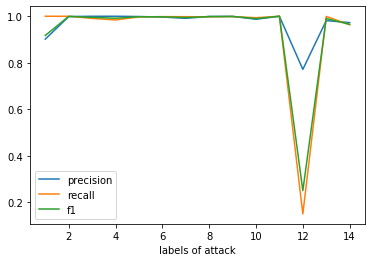

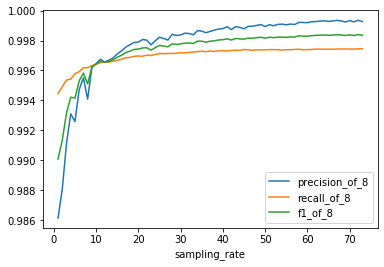

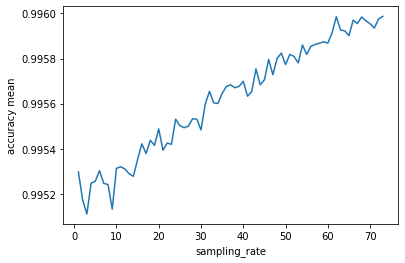

The sampling rate of the Dos_Slowhttptest attack is： 74
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1038807,)
Number of examples in the test set: (115432,)
accuracy_mean value is : 0.9960251789702271
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993575165346235 0.9974734798499274 0.9984142762429054
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

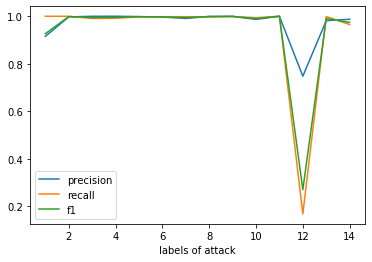

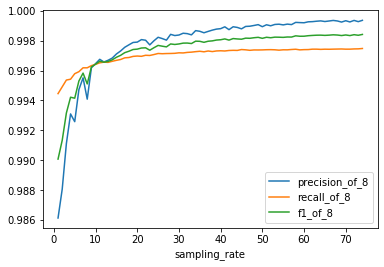

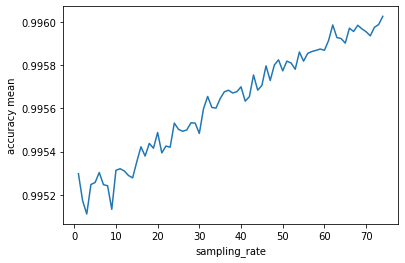

The sampling rate of the Dos_Slowhttptest attack is： 75
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1043756,)
Number of examples in the test set: (115982,)
accuracy_mean value is : 0.9959897028504254
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993563729267441 0.9974708318566468 0.9984123895508956
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

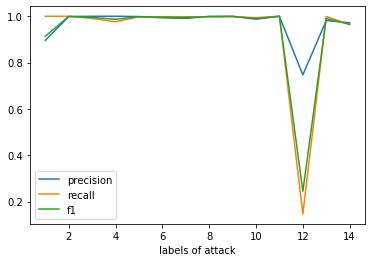

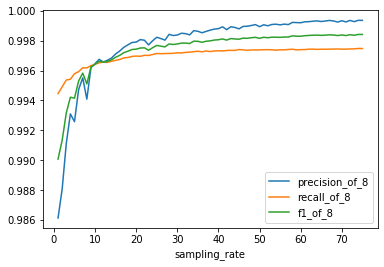

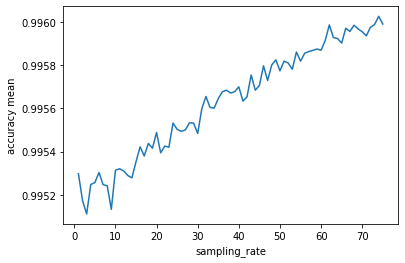

The sampling rate of the Dos_Slowhttptest attack is： 76
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1048705,)
Number of examples in the test set: (116532,)
accuracy_mean value is : 0.9960163545395005
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993531245934679 0.9974776993038736 0.99841414969287
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

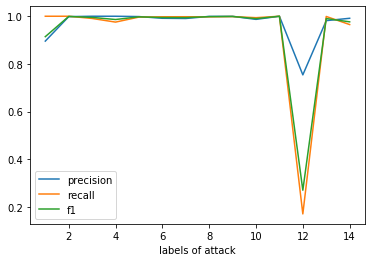

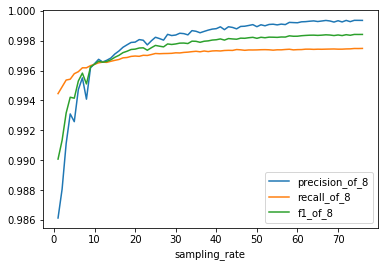

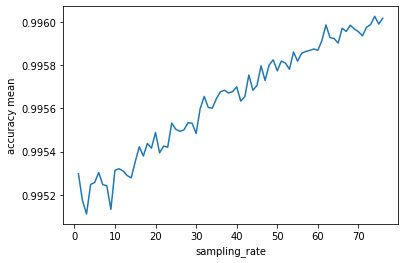

The sampling rate of the Dos_Slowhttptest attack is： 77
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1053654,)
Number of examples in the test set: (117082,)
accuracy_mean value is : 0.9960367753057998
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993823092250915 0.9974890536057771 0.9984344446216158
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

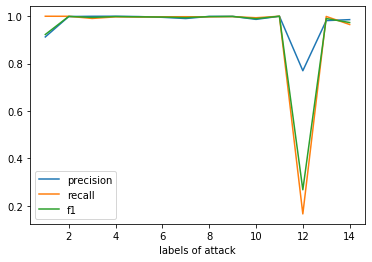

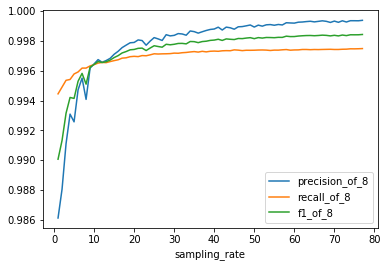

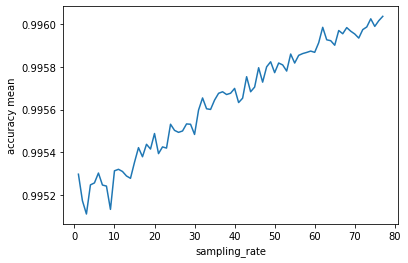

The sampling rate of the Dos_Slowhttptest attack is： 78
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1058603,)
Number of examples in the test set: (117632,)
accuracy_mean value is : 0.996013645553715
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993349018481789 0.997463290101782 0.9983978579117425
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 0

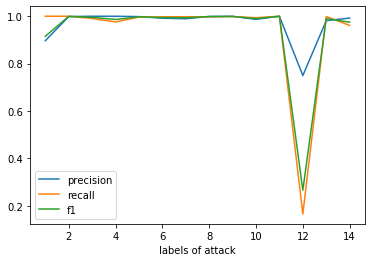

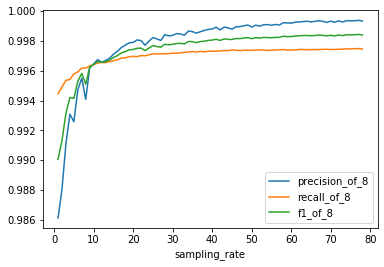

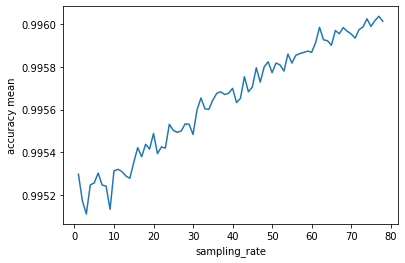

The sampling rate of the Dos_Slowhttptest attack is： 79
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1063553,)
Number of examples in the test set: (118181,)
accuracy_mean value is : 0.9960677258293742
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993409612536261 0.9974995453718858 0.9984190469866636
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

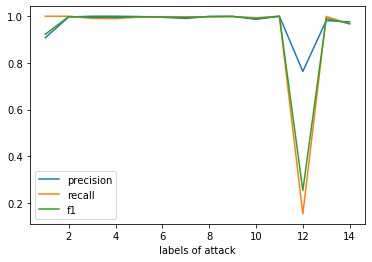

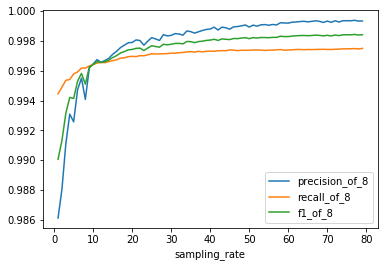

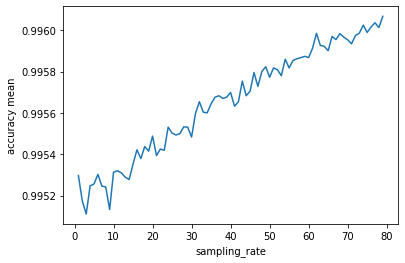

The sampling rate of the Dos_Slowhttptest attack is： 80
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1068502,)
Number of examples in the test set: (118731,)
accuracy_mean value is : 0.9960446649201122
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993355511687678 0.9974967388993768 0.9984149611321937
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

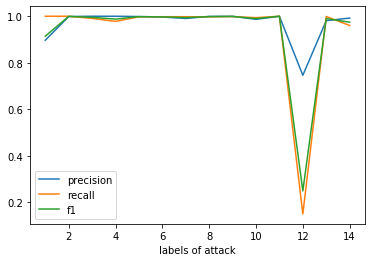

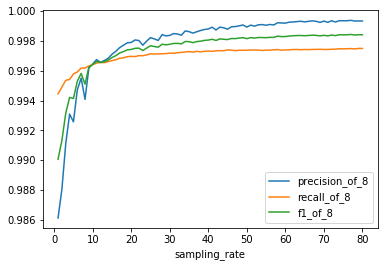

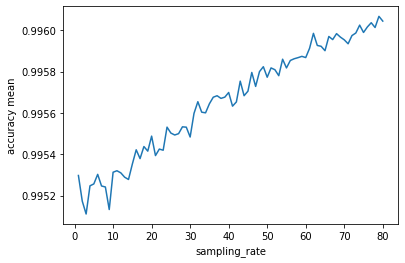

The sampling rate of the Dos_Slowhttptest attack is： 81
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1073451,)
Number of examples in the test set: (119281,)
accuracy_mean value is : 0.9960285270135276
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994056771369838 0.9974806947507906 0.998441956014877
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

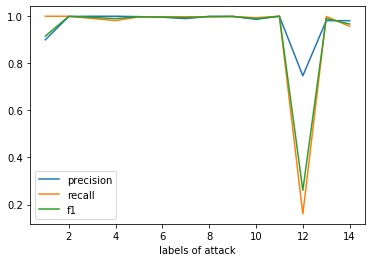

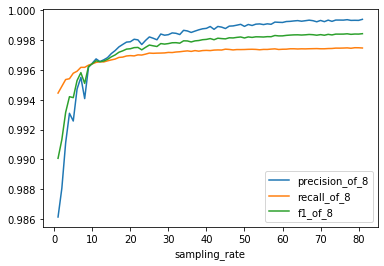

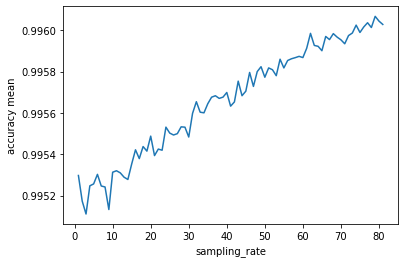

The sampling rate of the Dos_Slowhttptest attack is： 82
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1078400,)
Number of examples in the test set: (119831,)
accuracy_mean value is : 0.996061776159272
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993953186451542 0.9974935199973418 0.9984432115528147
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

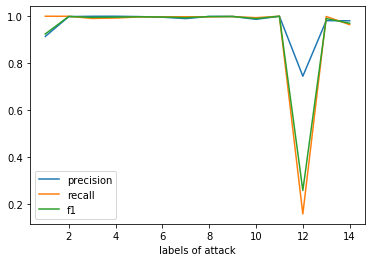

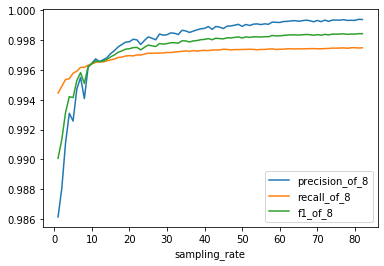

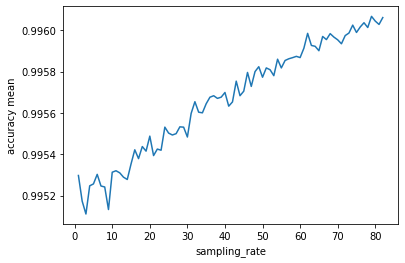

The sampling rate of the Dos_Slowhttptest attack is： 83
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1083349,)
Number of examples in the test set: (120381,)
accuracy_mean value is : 0.9960448753673867
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993441389591998 0.9975017100611676 0.9984217328539856
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

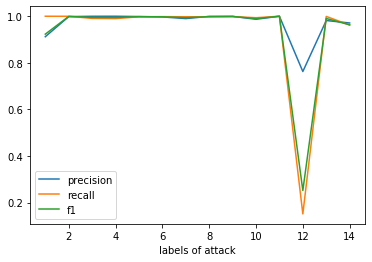

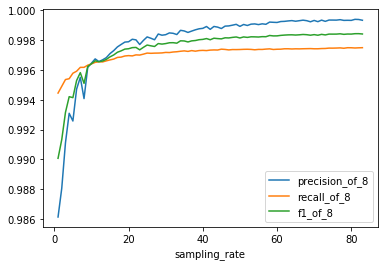

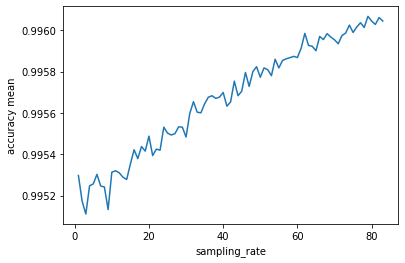

The sampling rate of the Dos_Slowhttptest attack is： 84
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1088298,)
Number of examples in the test set: (120931,)
accuracy_mean value is : 0.9960661714721276
precision_mean[7],recall_mean[7],f1_mean[7] 0.9993603871932206 0.9974925918695632 0.9984252850525444
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

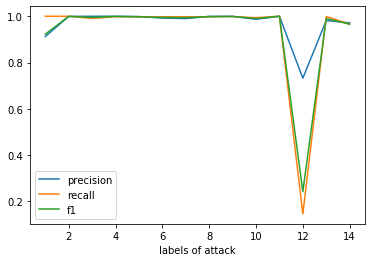

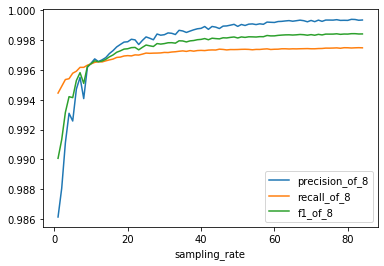

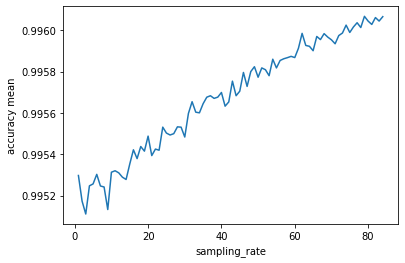

The sampling rate of the Dos_Slowhttptest attack is： 85
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1093247,)
Number of examples in the test set: (121481,)
accuracy_mean value is : 0.9960930375674195
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994248147067749 0.9975154042683171 0.9984689239715255
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

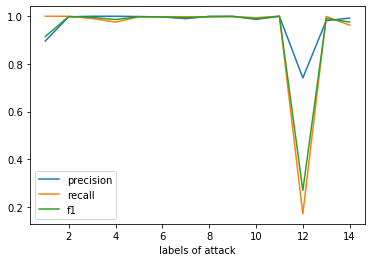

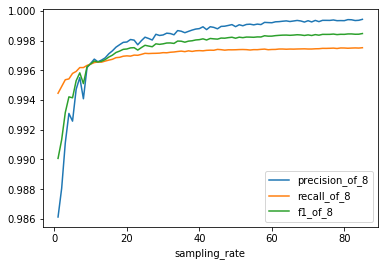

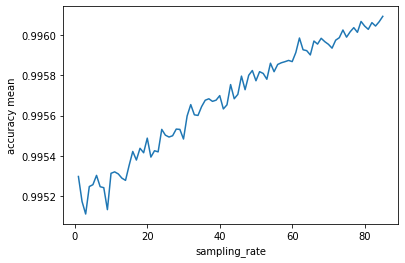

The sampling rate of the Dos_Slowhttptest attack is： 86
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1098196,)
Number of examples in the test set: (122031,)
accuracy_mean value is : 0.9960745856533462
precision_mean[7],recall_mean[7],f1_mean[7] 0.999435598025542 0.9974791651935752 0.9984561438439441
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

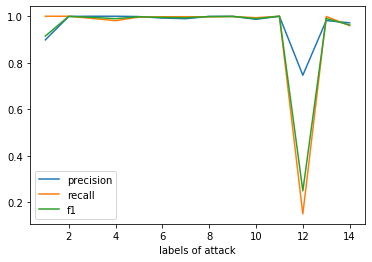

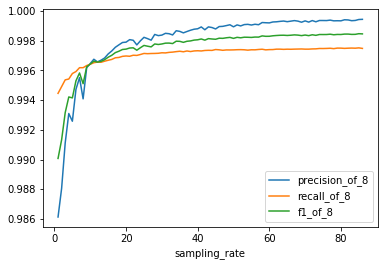

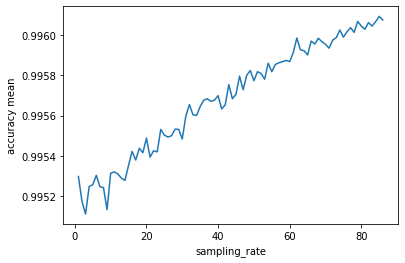

The sampling rate of the Dos_Slowhttptest attack is： 87
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1103145,)
Number of examples in the test set: (122581,)
accuracy_mean value is : 0.9960848557223425
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994460983076813 0.9974954121582604 0.9984695460620878
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

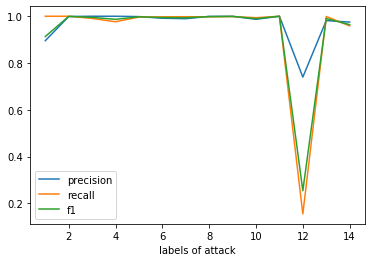

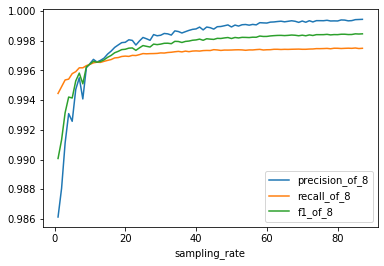

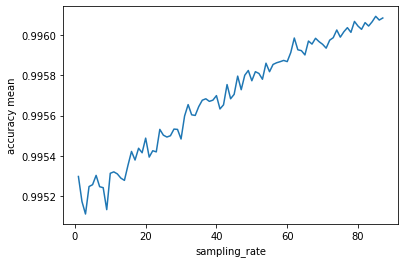

The sampling rate of the Dos_Slowhttptest attack is： 88
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1108094,)
Number of examples in the test set: (123131,)
accuracy_mean value is : 0.9961340173745181
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994706108451595 0.9975112941130785 0.9984897735260054
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

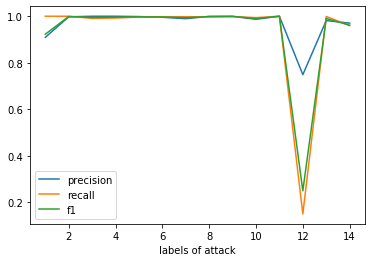

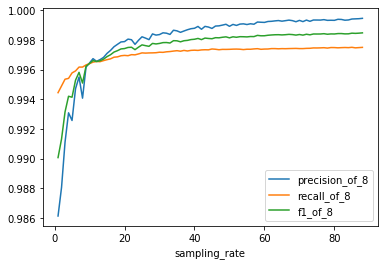

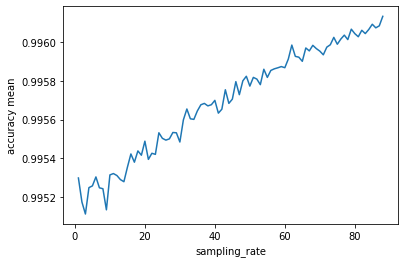

The sampling rate of the Dos_Slowhttptest attack is： 89
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1113044,)
Number of examples in the test set: (123680,)
accuracy_mean value is : 0.9961479628892318
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994341149348397 0.9975106585035665 0.998471211695714
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

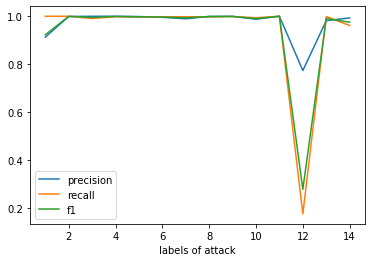

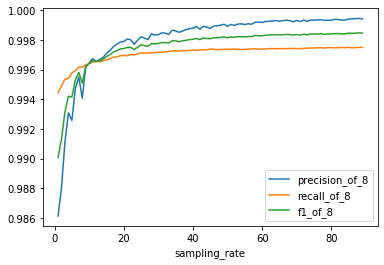

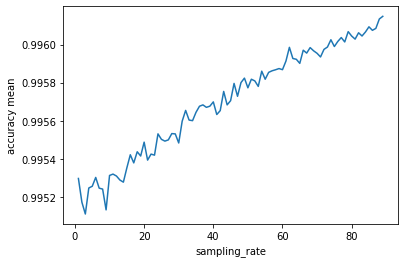

The sampling rate of the Dos_Slowhttptest attack is： 90
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1117993,)
Number of examples in the test set: (124230,)
accuracy_mean value is : 0.9961255680762576
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994642728179899 0.9975020432485968 0.9984819679834718
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

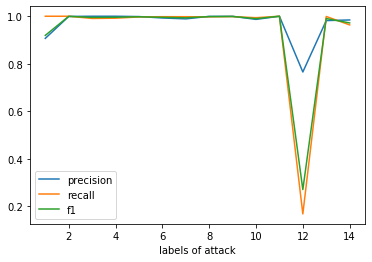

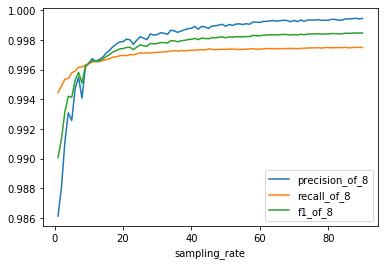

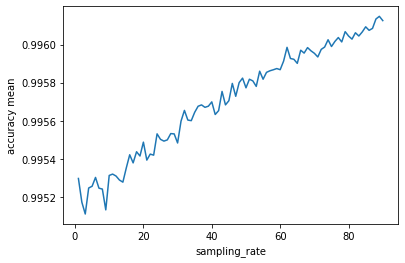

The sampling rate of the Dos_Slowhttptest attack is： 91
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1122942,)
Number of examples in the test set: (124780,)
accuracy_mean value is : 0.9961234096472456
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994661618753158 0.9975193117333353 0.9984915556714016
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

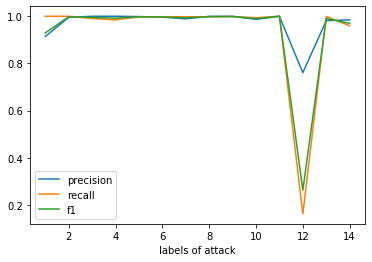

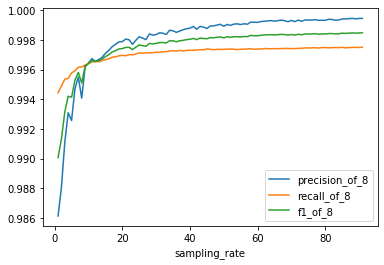

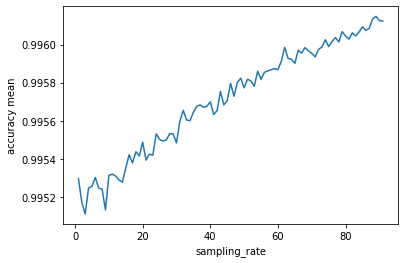

The sampling rate of the Dos_Slowhttptest attack is： 92
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1127891,)
Number of examples in the test set: (125330,)
accuracy_mean value is : 0.9961651589047749
precision_mean[7],recall_mean[7],f1_mean[7] 0.9995031881243079 0.9975244765067341 0.9985126379590665
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

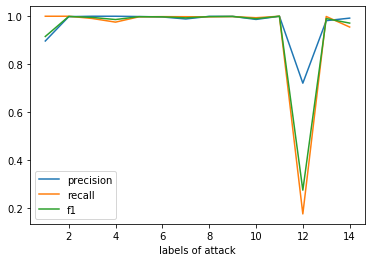

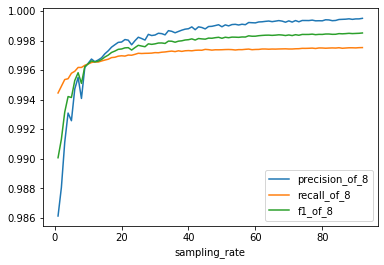

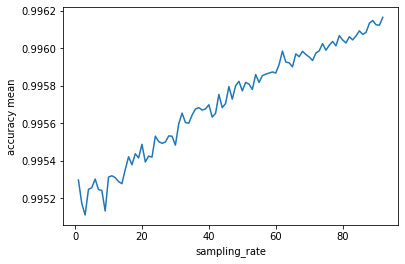

The sampling rate of the Dos_Slowhttptest attack is： 93
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1132840,)
Number of examples in the test set: (125880,)
accuracy_mean value is : 0.9961461613244476
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994929902965717 0.9975005125831832 0.9984955343839251
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

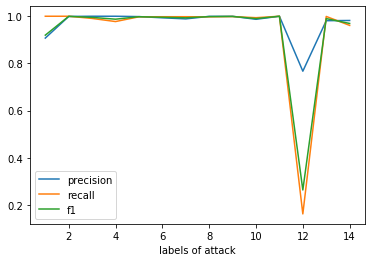

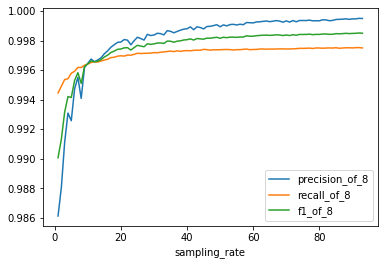

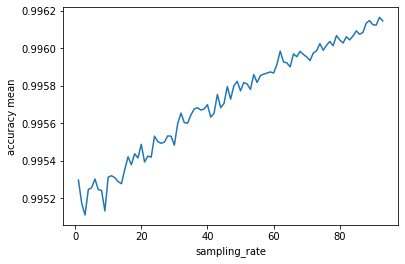

The sampling rate of the Dos_Slowhttptest attack is： 94
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1137789,)
Number of examples in the test set: (126430,)
accuracy_mean value is : 0.9961455222829958
precision_mean[7],recall_mean[7],f1_mean[7] 0.9995136516103766 0.9975191660540281 0.9985151941697941
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

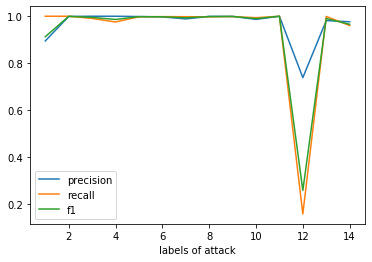

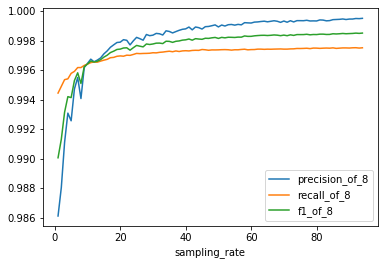

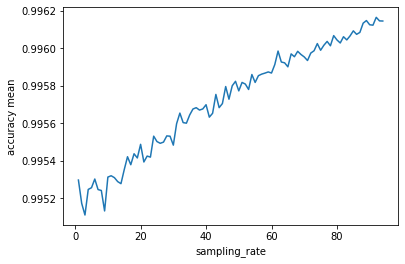

The sampling rate of the Dos_Slowhttptest attack is： 95
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1142738,)
Number of examples in the test set: (126980,)
accuracy_mean value is : 0.9961574916088018
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994769594258521 0.9975260651153501 0.9985003558826808
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

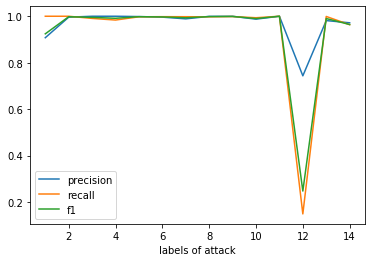

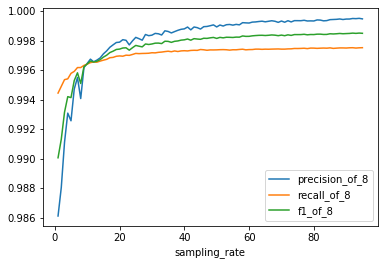

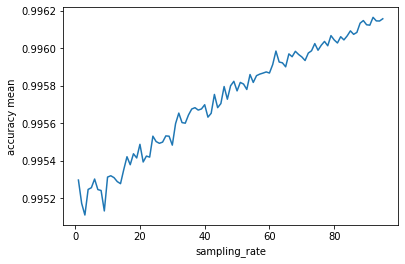

The sampling rate of the Dos_Slowhttptest attack is： 96
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1147687,)
Number of examples in the test set: (127530,)
accuracy_mean value is : 0.9961285793039778
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994674046212616 0.9975065755627774 0.998485801882157
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298, 

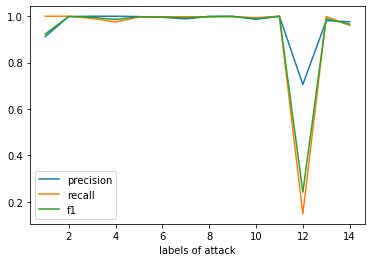

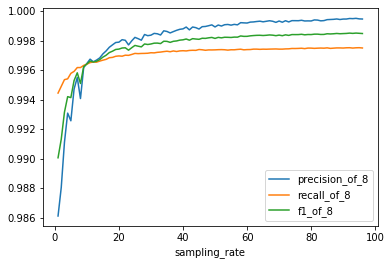

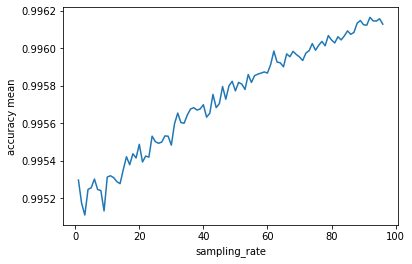

The sampling rate of the Dos_Slowhttptest attack is： 97
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1152636,)
Number of examples in the test set: (128080,)
accuracy_mean value is : 0.9961553543096006
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994839365752684 0.9975116066860442 0.9984965879056918
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

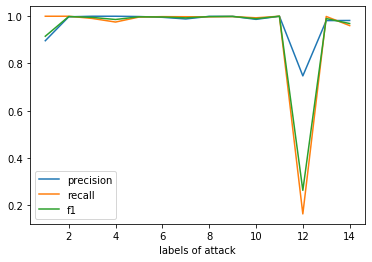

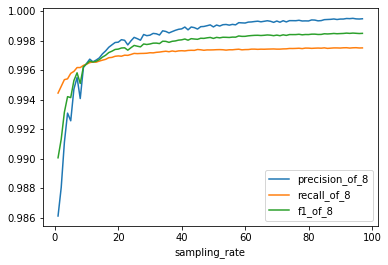

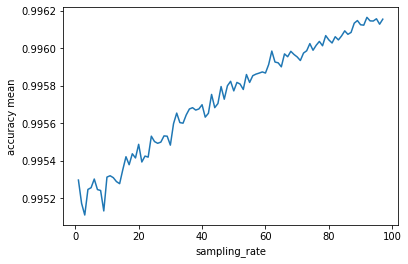

The sampling rate of the Dos_Slowhttptest attack is： 98
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1157585,)
Number of examples in the test set: (128630,)
accuracy_mean value is : 0.9961469115992436
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994798860563581 0.9975165364155828 0.9984970546737821
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

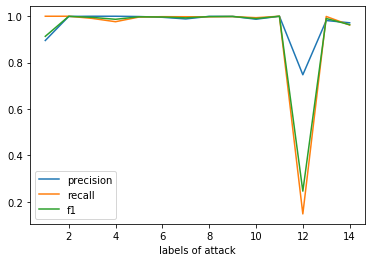

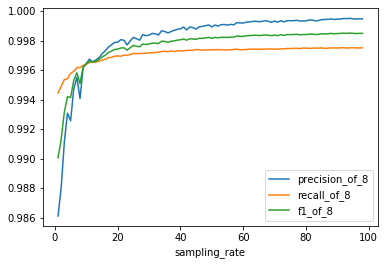

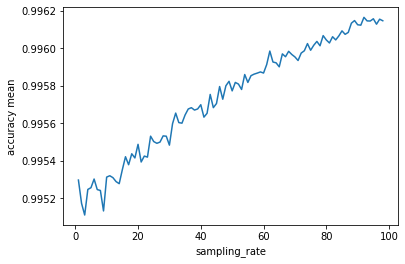

The sampling rate of the Dos_Slowhttptest attack is： 99
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1162535,)
Number of examples in the test set: (129179,)
accuracy_mean value is : 0.9961462743124478
precision_mean[7],recall_mean[7],f1_mean[7] 0.9995033441047827 0.9975140934715402 0.9985075249414047
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298,

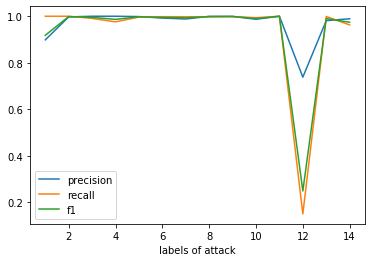

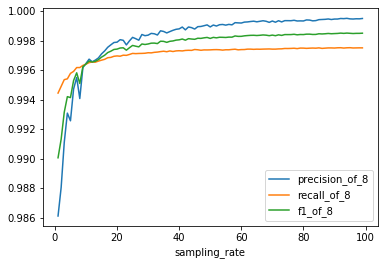

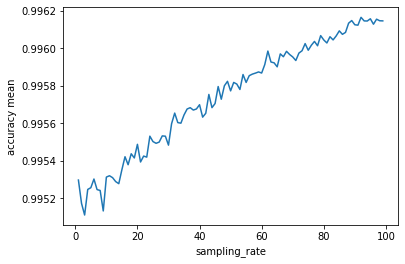

The sampling rate of the Dos_Slowhttptest attack is： 100
8
1 1
n_splits_k value is: 10
Number of examples in the train set: (1167484,)
Number of examples in the test set: (129729,)
accuracy_mean value is : 0.9961780273599699
precision_mean[7],recall_mean[7],f1_mean[7] 0.9994938186367219 0.9975207011941629 0.9985060907969157
[0.986130407968081, 0.988060799900245, 0.9911140079043218, 0.9930957509085163, 0.9925771219825489, 0.9947229533484145, 0.9955092944750982, 0.994083436618521, 0.9961827501174749, 0.9964601079330162, 0.9967494790863132, 0.9965715166801952, 0.9966851741517061, 0.9968321967439252, 0.9971052328541475, 0.9973058874827183, 0.9975540201898946, 0.9977191900016411, 0.9978774672883303, 0.9979000176419689, 0.9980681202395741, 0.9980264069391666, 0.9977147237968197, 0.9979891794077107, 0.9982248421657612, 0.9981368455329447, 0.9980329980894286, 0.9984195474346302, 0.998339765653984, 0.9983751044267606, 0.998493816192887, 0.9984679881054106, 0.9983853233845918, 0.9986688426683298

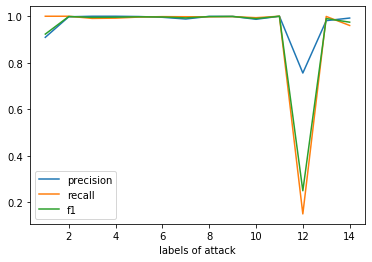

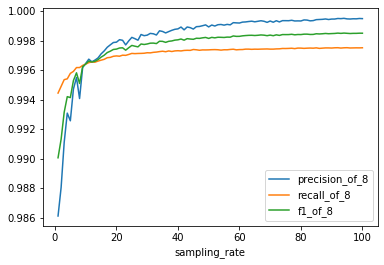

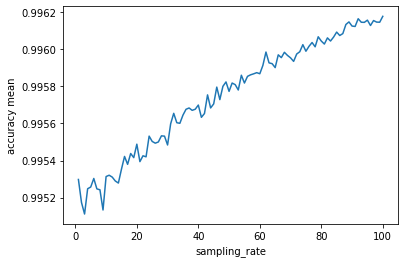

In [5]:
if __name__=="__main__":
    run_main()